In [1]:
###--------------------------------------------LOAD LIBRARIES
import scanpy as sc
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [2]:
###--------------------------------------------LOAD DATA

#--Load tangram deconvoluted data and combine IF and nonIF data
adata = sc.read("../LIBD_LR/grantpm/DLPFC_Visium_LIBD/processed-data/MGP_analysis/nonIF_c2l_anndata_combined.h5ad")
adata.obs['key'] = adata.obs.index+'_'+adata.obs['sample_id'].astype(str)
adata.obs['bayesSpace_harmony_2'] = adata.obs['bayesSpace_harmony_2'].astype('category')
adata.obs['bayesSpace_harmony_9'] = adata.obs['bayesSpace_harmony_9'].astype('category')
adata.obs['bayesSpace_harmony_16'] = adata.obs['bayesSpace_harmony_16'].astype('category')
adata.obs['bayesSpace_harmony_28'] = adata.obs['bayesSpace_harmony_28'].astype('category')
adata.obs['bayesSpace_harmony_9'] = adata.obs['bayesSpace_harmony_9'].cat.rename_categories({1: 'SpD1 ~ L1', 
                                                     2: 'SpD2 ~ L1', 
                                                     3 : 'SpD3 ~ L2', 
                                                     4 : 'SpD4 ~ L5', 
                                                     5 : 'SpD5 ~ L3', 
                                                     6 : 'SpD6 ~ WM', 
                                                     7 : 'SpD7 ~ L6', 
                                                     8 : 'SpD8 ~ L4', 
                                                     9 : 'SpD9 ~ WM'})


In [6]:
sd

,bayesSpace_harmony_2,bayesSpace_harmony_9,bayesSpace_harmony_16,bayesSpace_harmony_28,score,resolution
key,,,,,,
AAACAACGAATAGTTC-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD7 ~ L6,7,14,0.046406,0.1
AAACAAGTATCTCCCA-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD3 ~ L2,8,9,0.047967,0.1
AAACAATCTACTAGCA-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,1,SpD9 ~ WM,13,16,0.019050,0.1
AAACAGAGCGACTCCT-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD7 ~ L6,12,19,0.034113,0.1
AAACAGCTTTCAGAAG-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD3 ~ L2,8,2,0.031964,0.1
...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1_Br3942_ant-1,2,SpD4 ~ L5,4,4,-0.091303,0.7
TTGTTGTGTGTCAAGA-1_Br3942_ant-1,2,SpD3 ~ L2,8,1,0.118904,0.7
TTGTTTCACATCCAGG-1_Br3942_ant-1,1,SpD9 ~ WM,13,6,0.058046,0.7


0.1


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

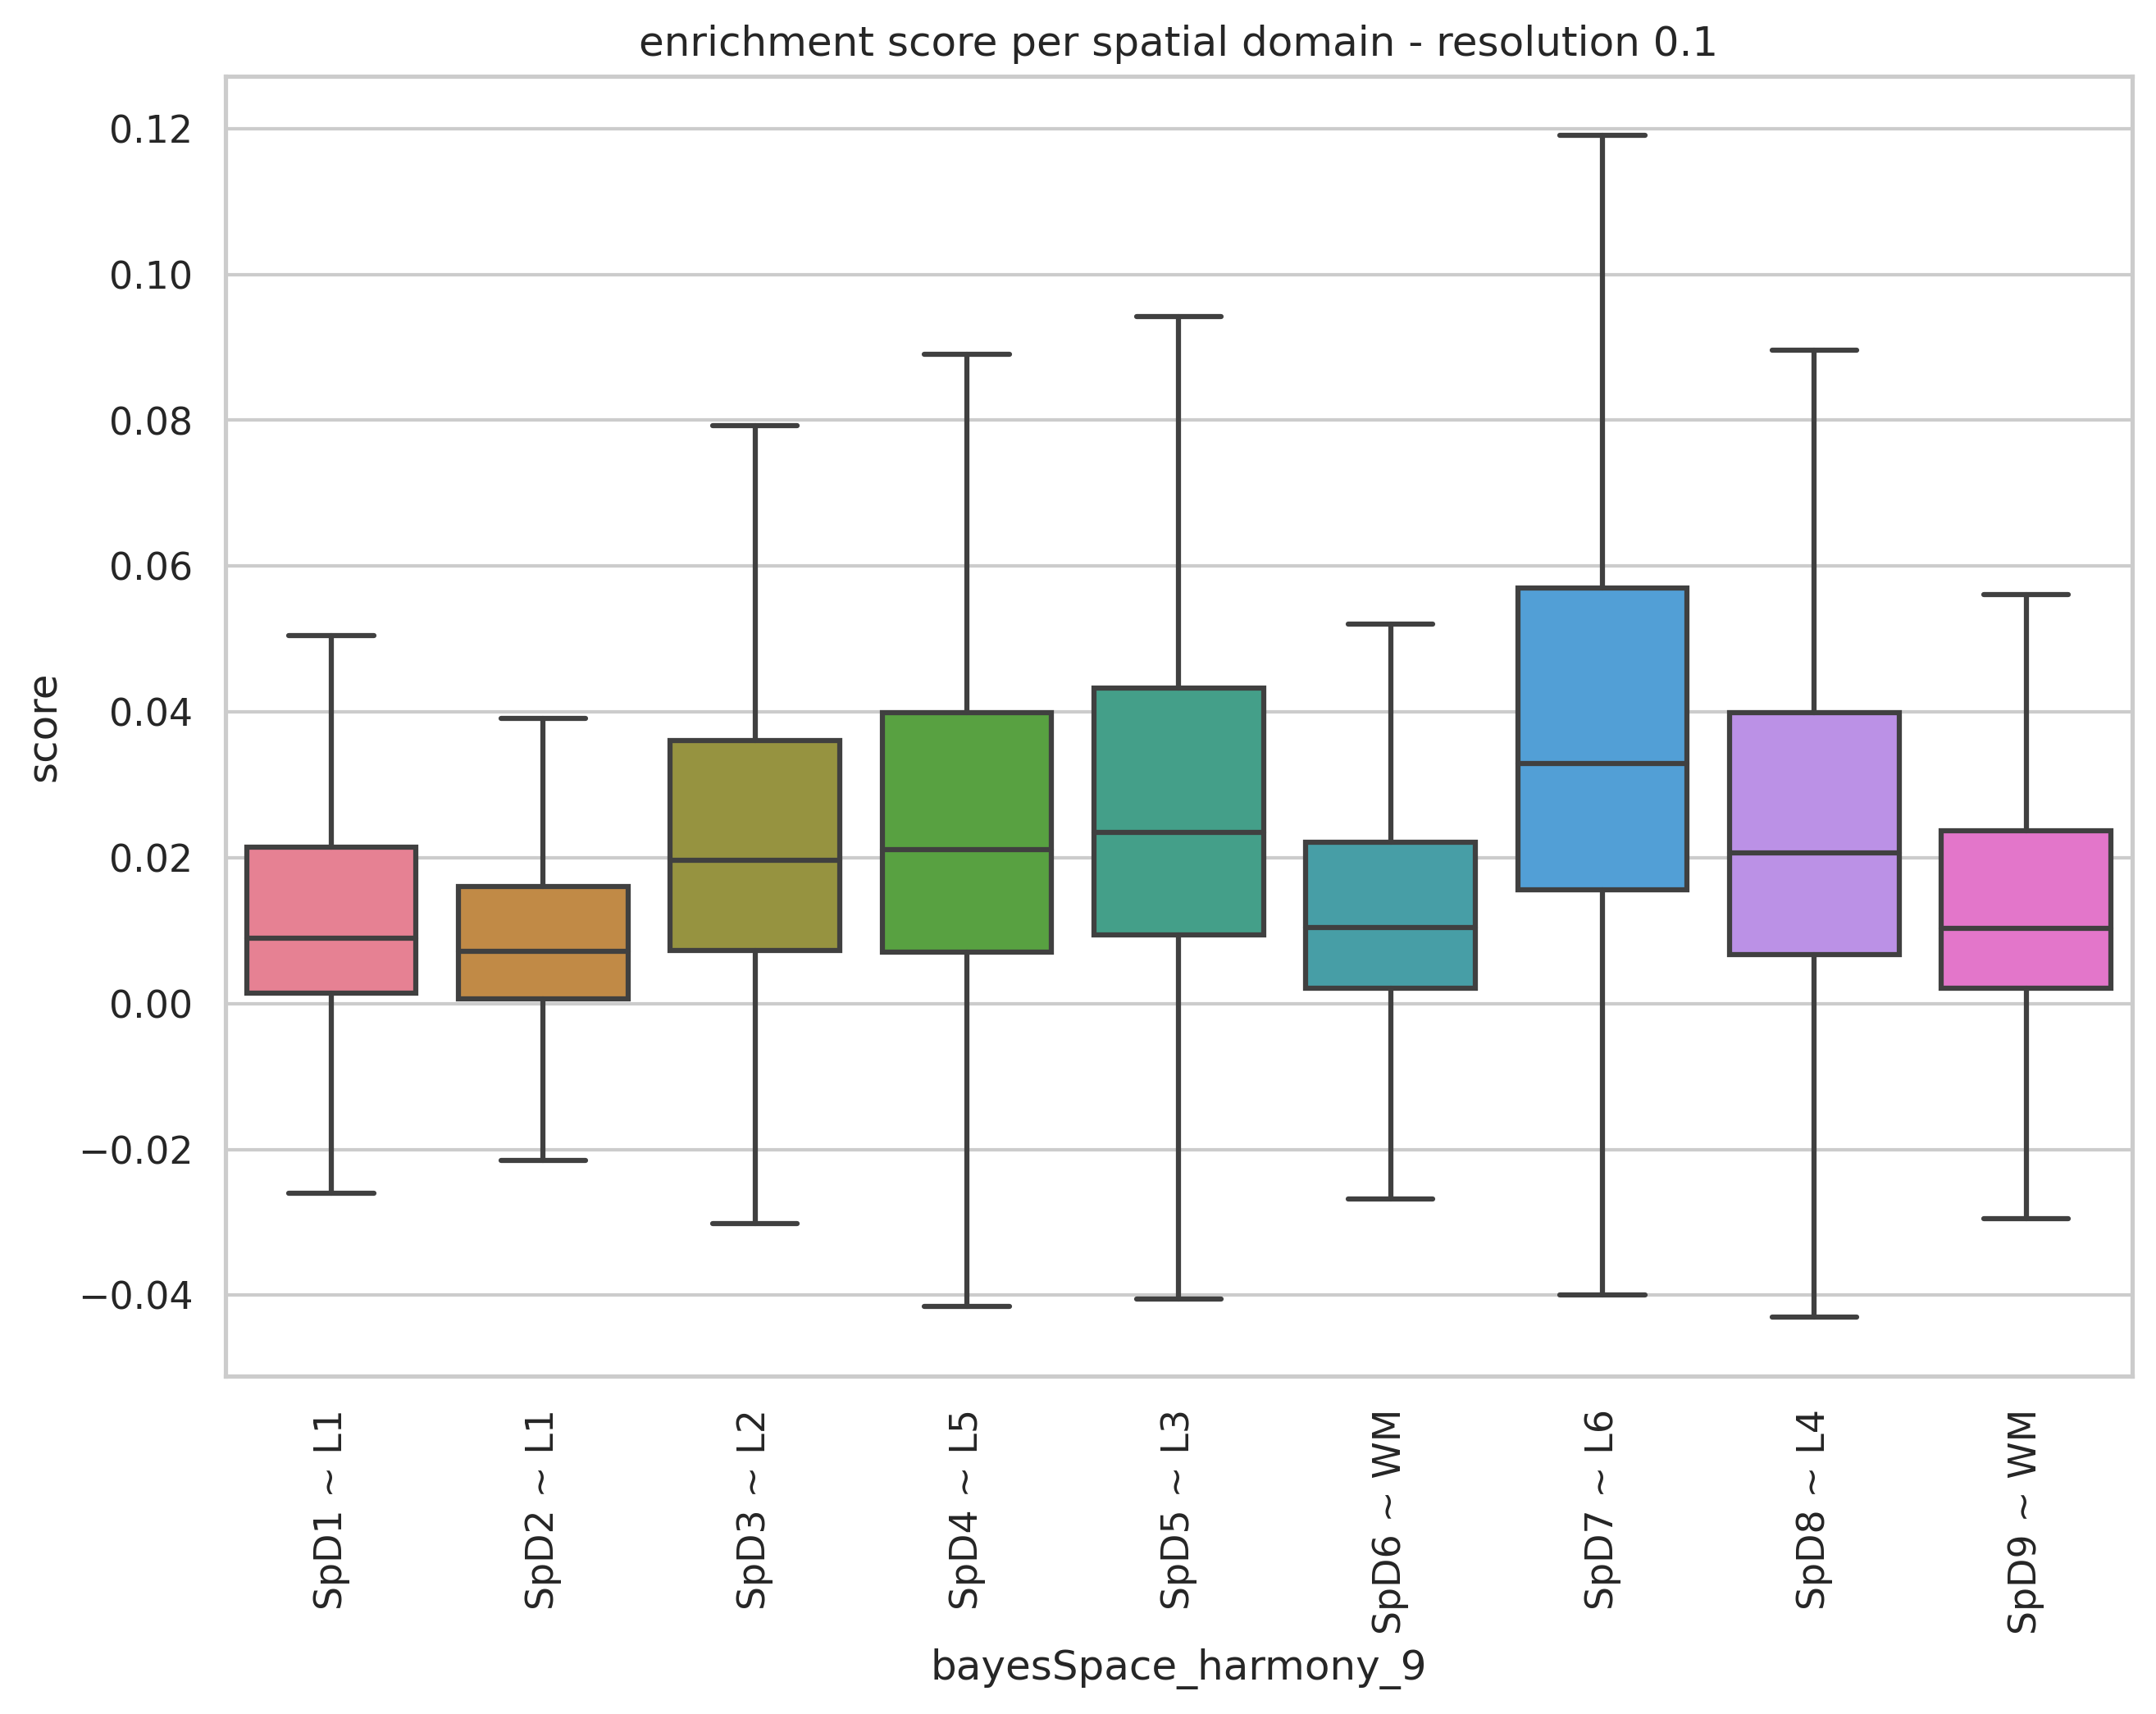

                  0
SpD1 ~ L1  0.208751
SpD2 ~ L1  0.226325
SpD3 ~ L2  0.116524
SpD4 ~ L5  0.135287
SpD5 ~ L3  0.099862
SpD6 ~ WM  0.188896
SpD7 ~ L6  0.057821
SpD8 ~ L4  0.137393
SpD9 ~ WM  0.183109
0.2


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

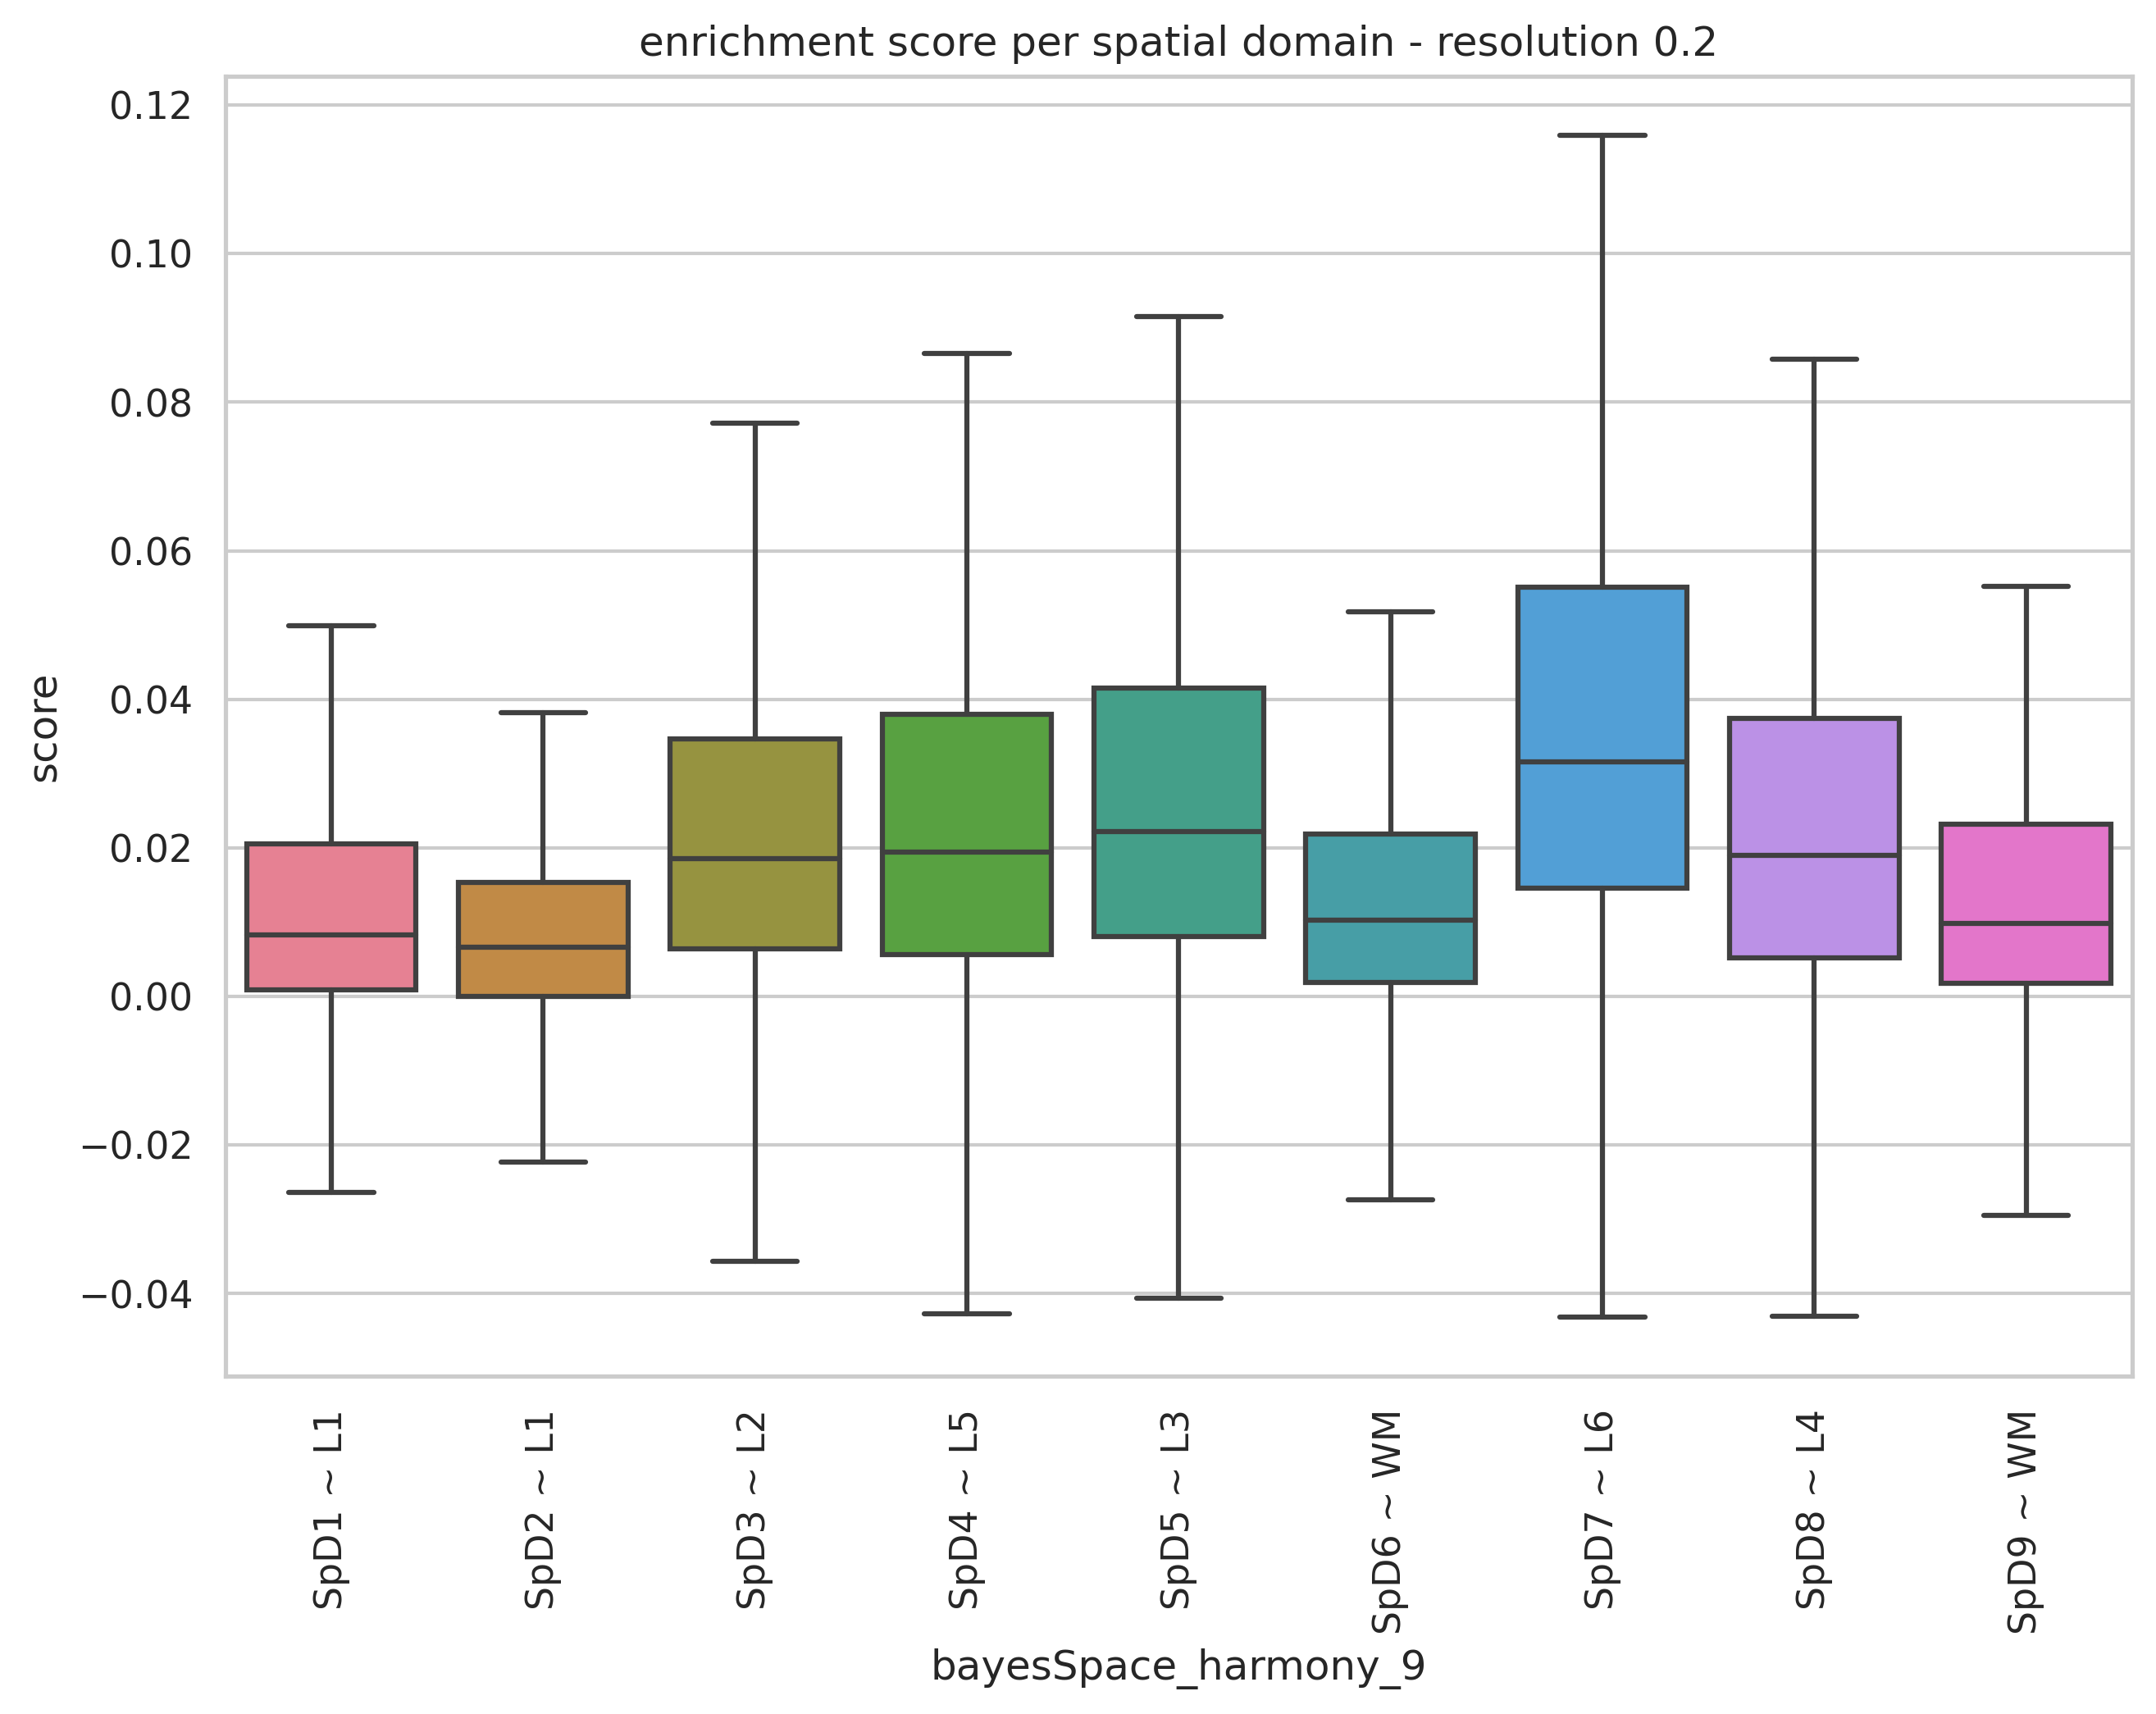

                  0
SpD1 ~ L1  0.238798
SpD2 ~ L1  0.269872
SpD3 ~ L2  0.144729
SpD4 ~ L5  0.177845
SpD5 ~ L3  0.131947
SpD6 ~ WM  0.210923
SpD7 ~ L6  0.076101
SpD8 ~ L4  0.181319
SpD9 ~ WM  0.205104
0.3


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

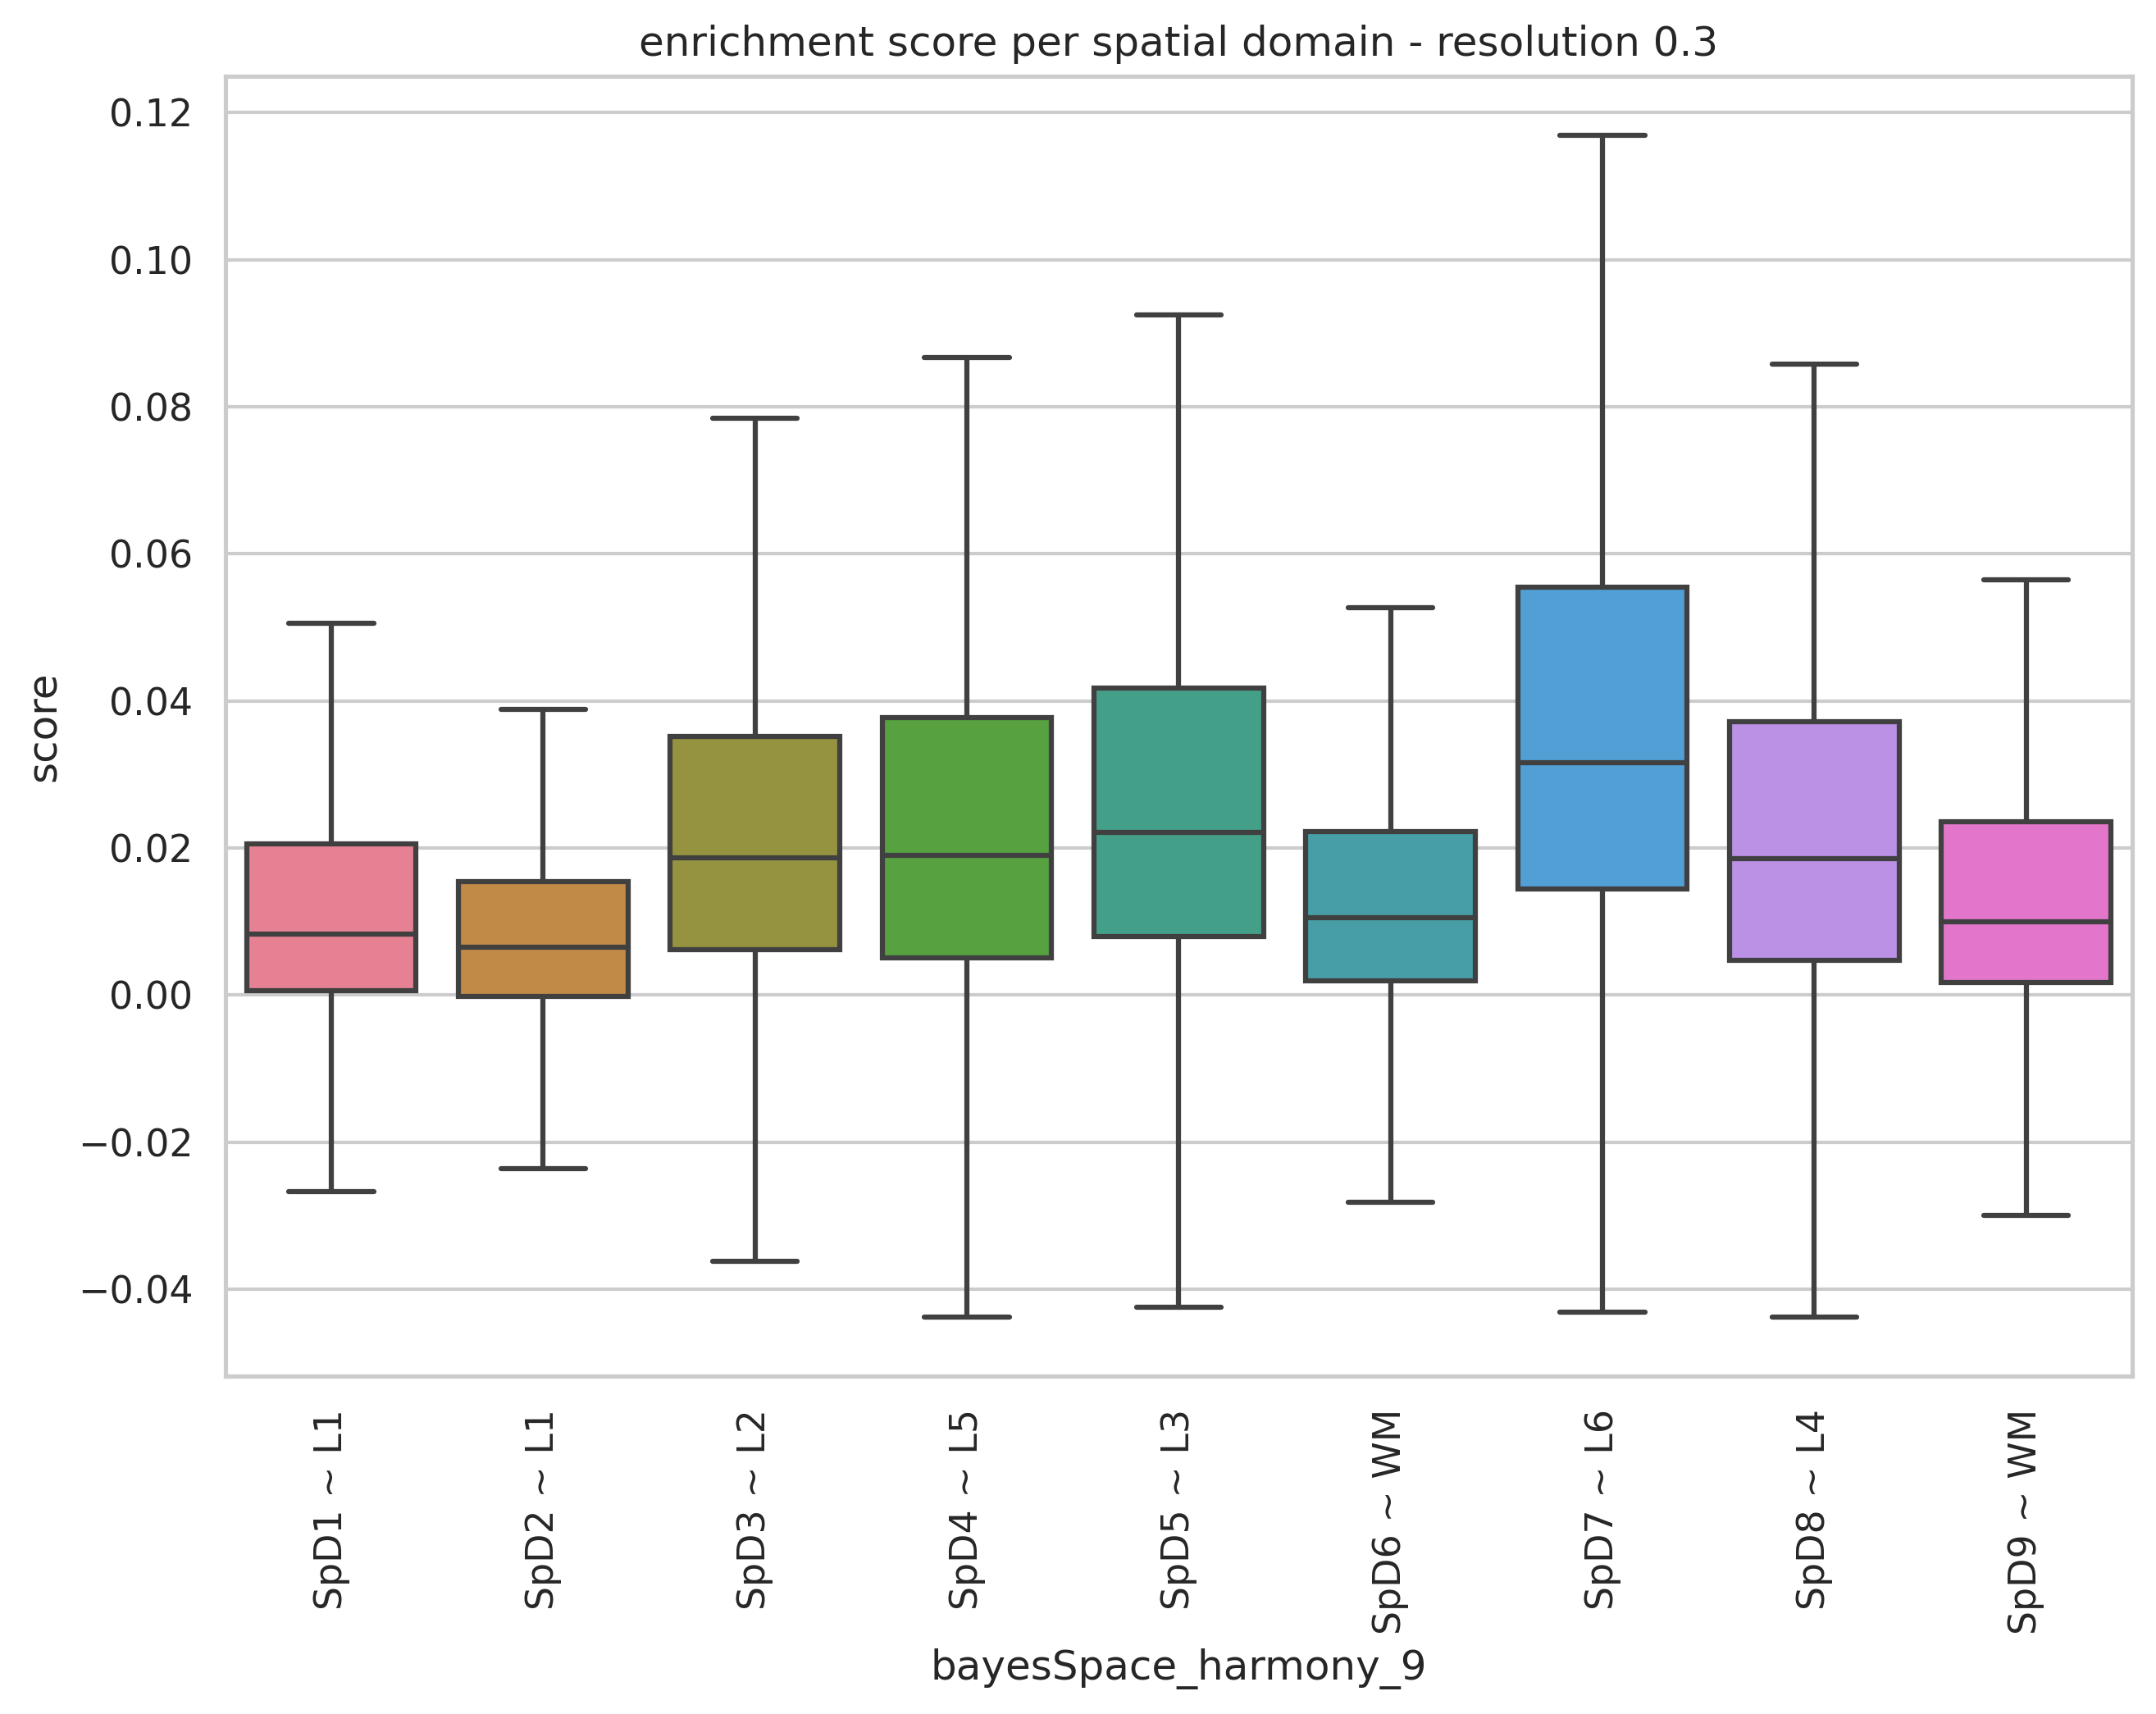

                  0
SpD1 ~ L1  0.246705
SpD2 ~ L1  0.271467
SpD3 ~ L2  0.146296
SpD4 ~ L5  0.184451
SpD5 ~ L3  0.132004
SpD6 ~ WM  0.203229
SpD7 ~ L6  0.076307
SpD8 ~ L4  0.186498
SpD9 ~ WM  0.202541
0.4


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

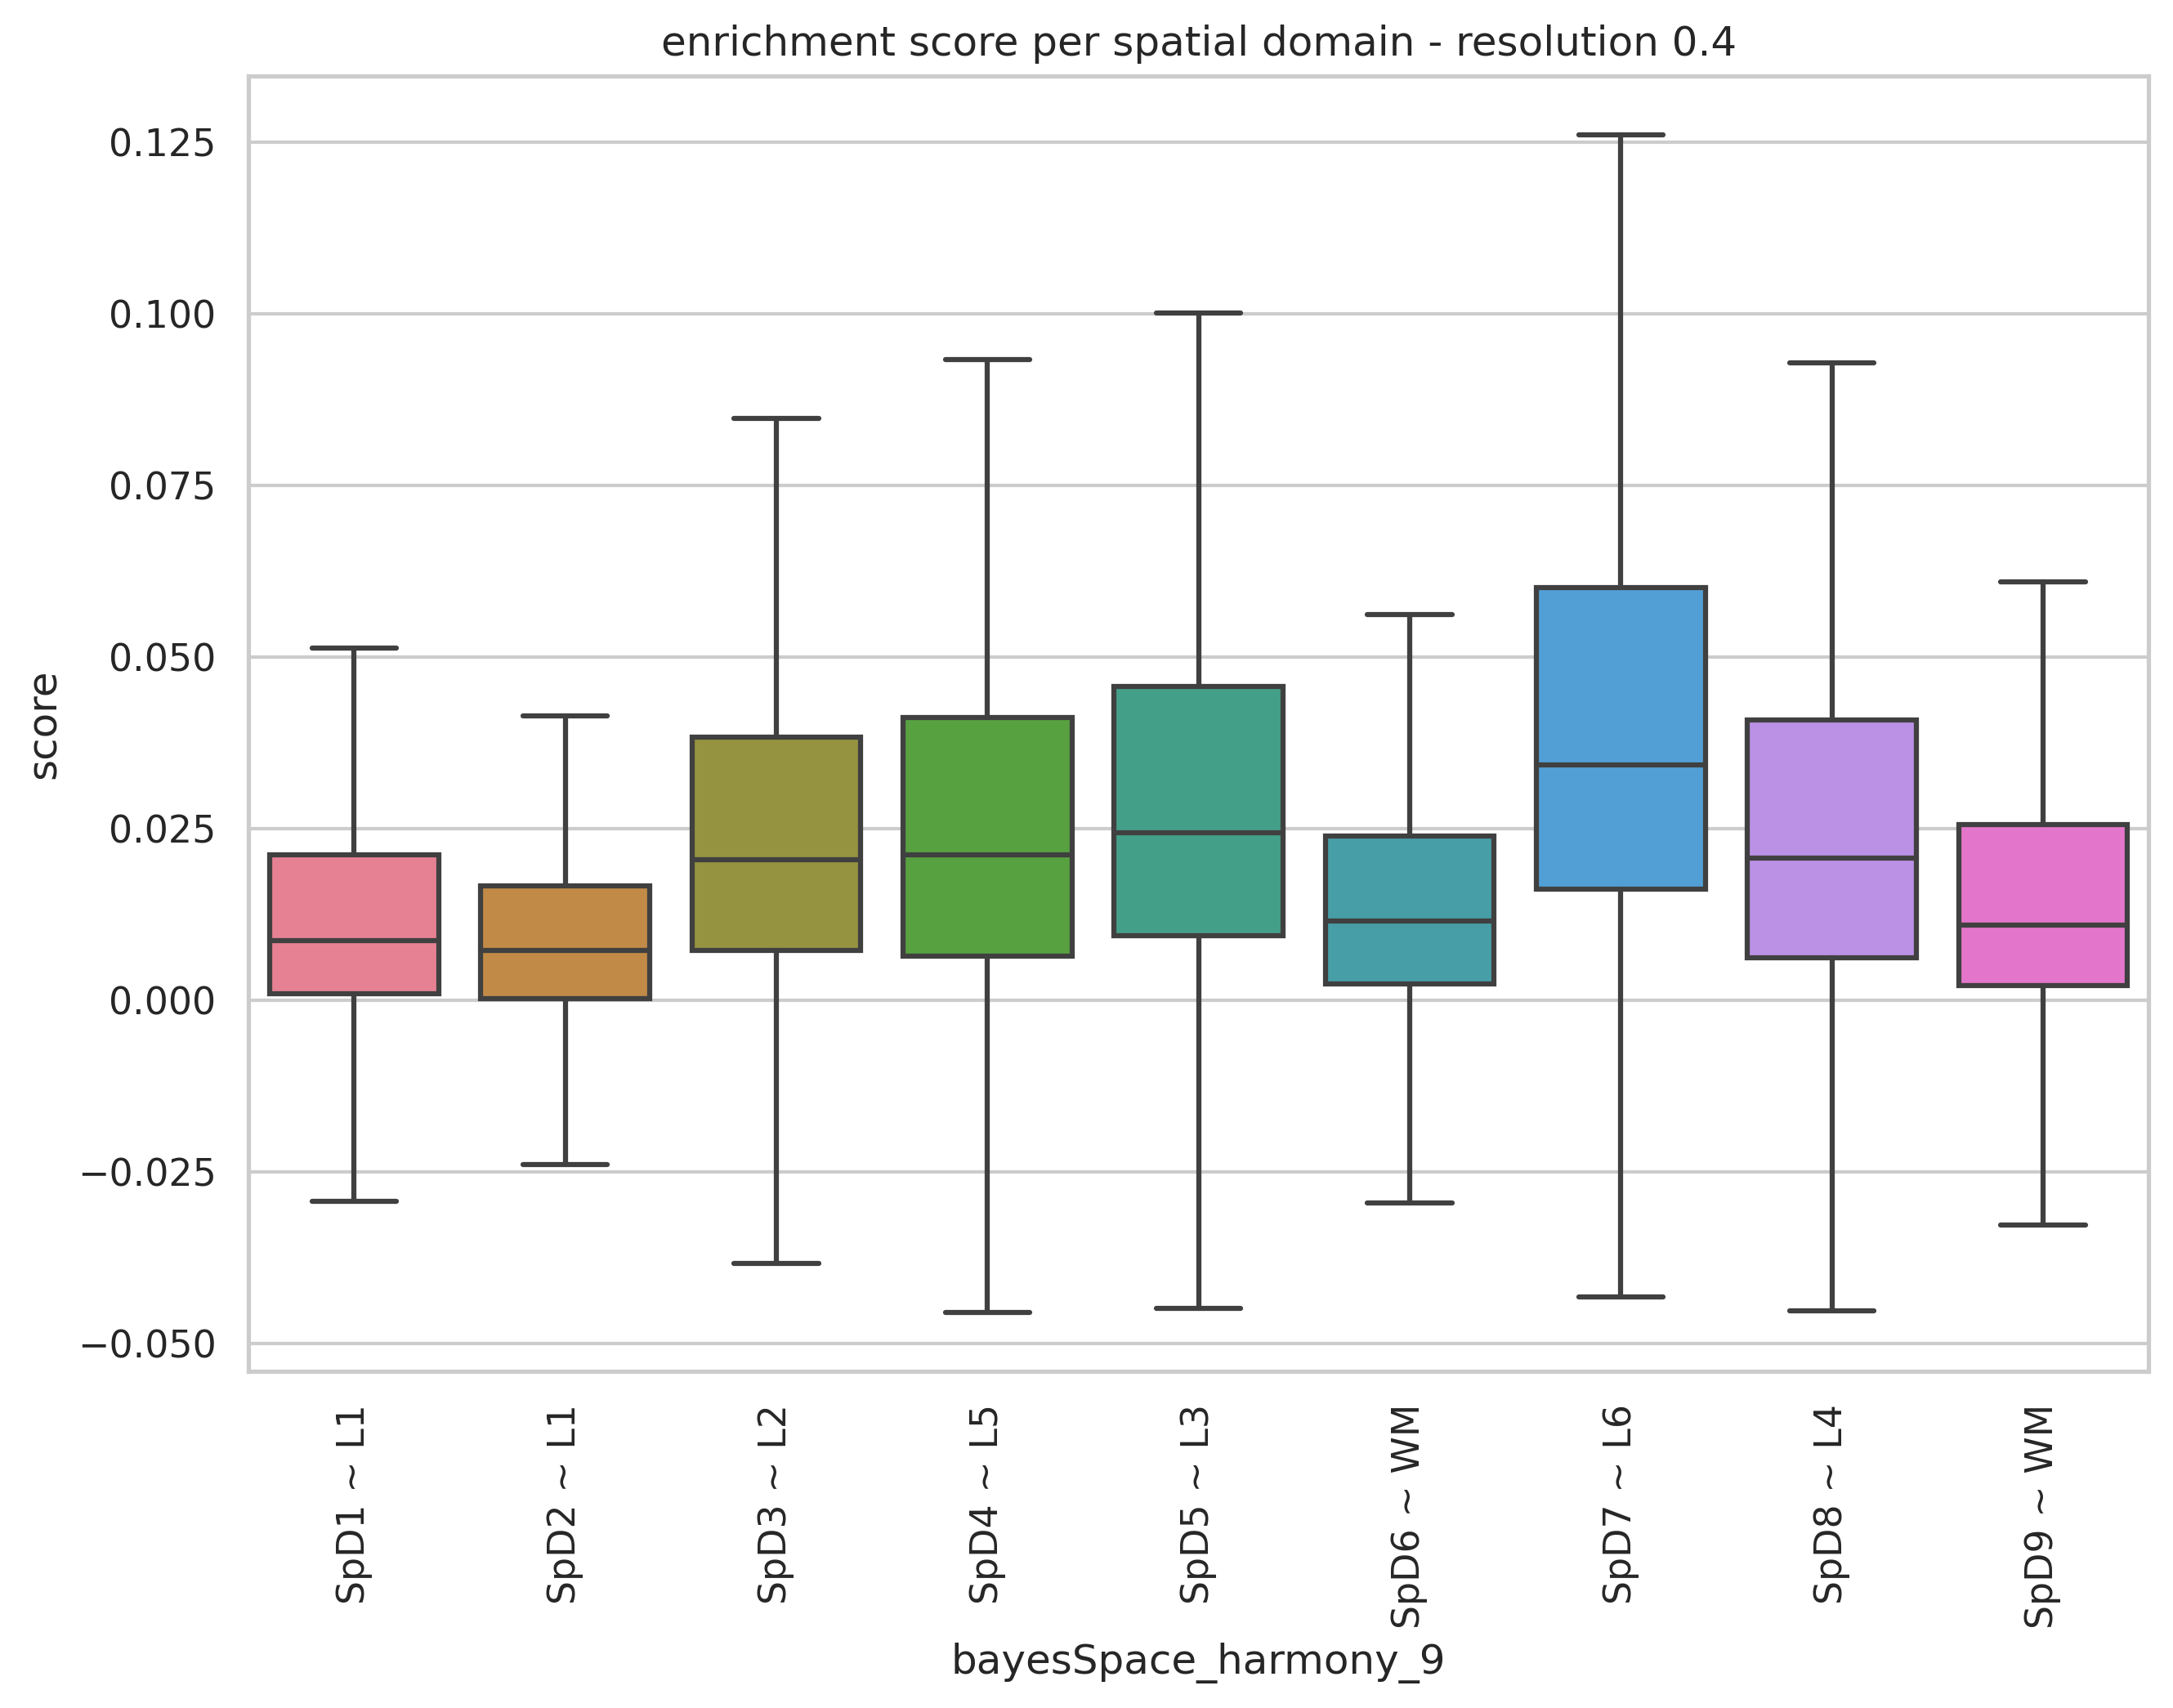

                  0
SpD1 ~ L1  0.201371
SpD2 ~ L1  0.200932
SpD3 ~ L2  0.086538
SpD4 ~ L5  0.100101
SpD5 ~ L3  0.071388
SpD6 ~ WM  0.150724
SpD7 ~ L6  0.037383
SpD8 ~ L4  0.101953
SpD9 ~ WM  0.146808
0.5


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

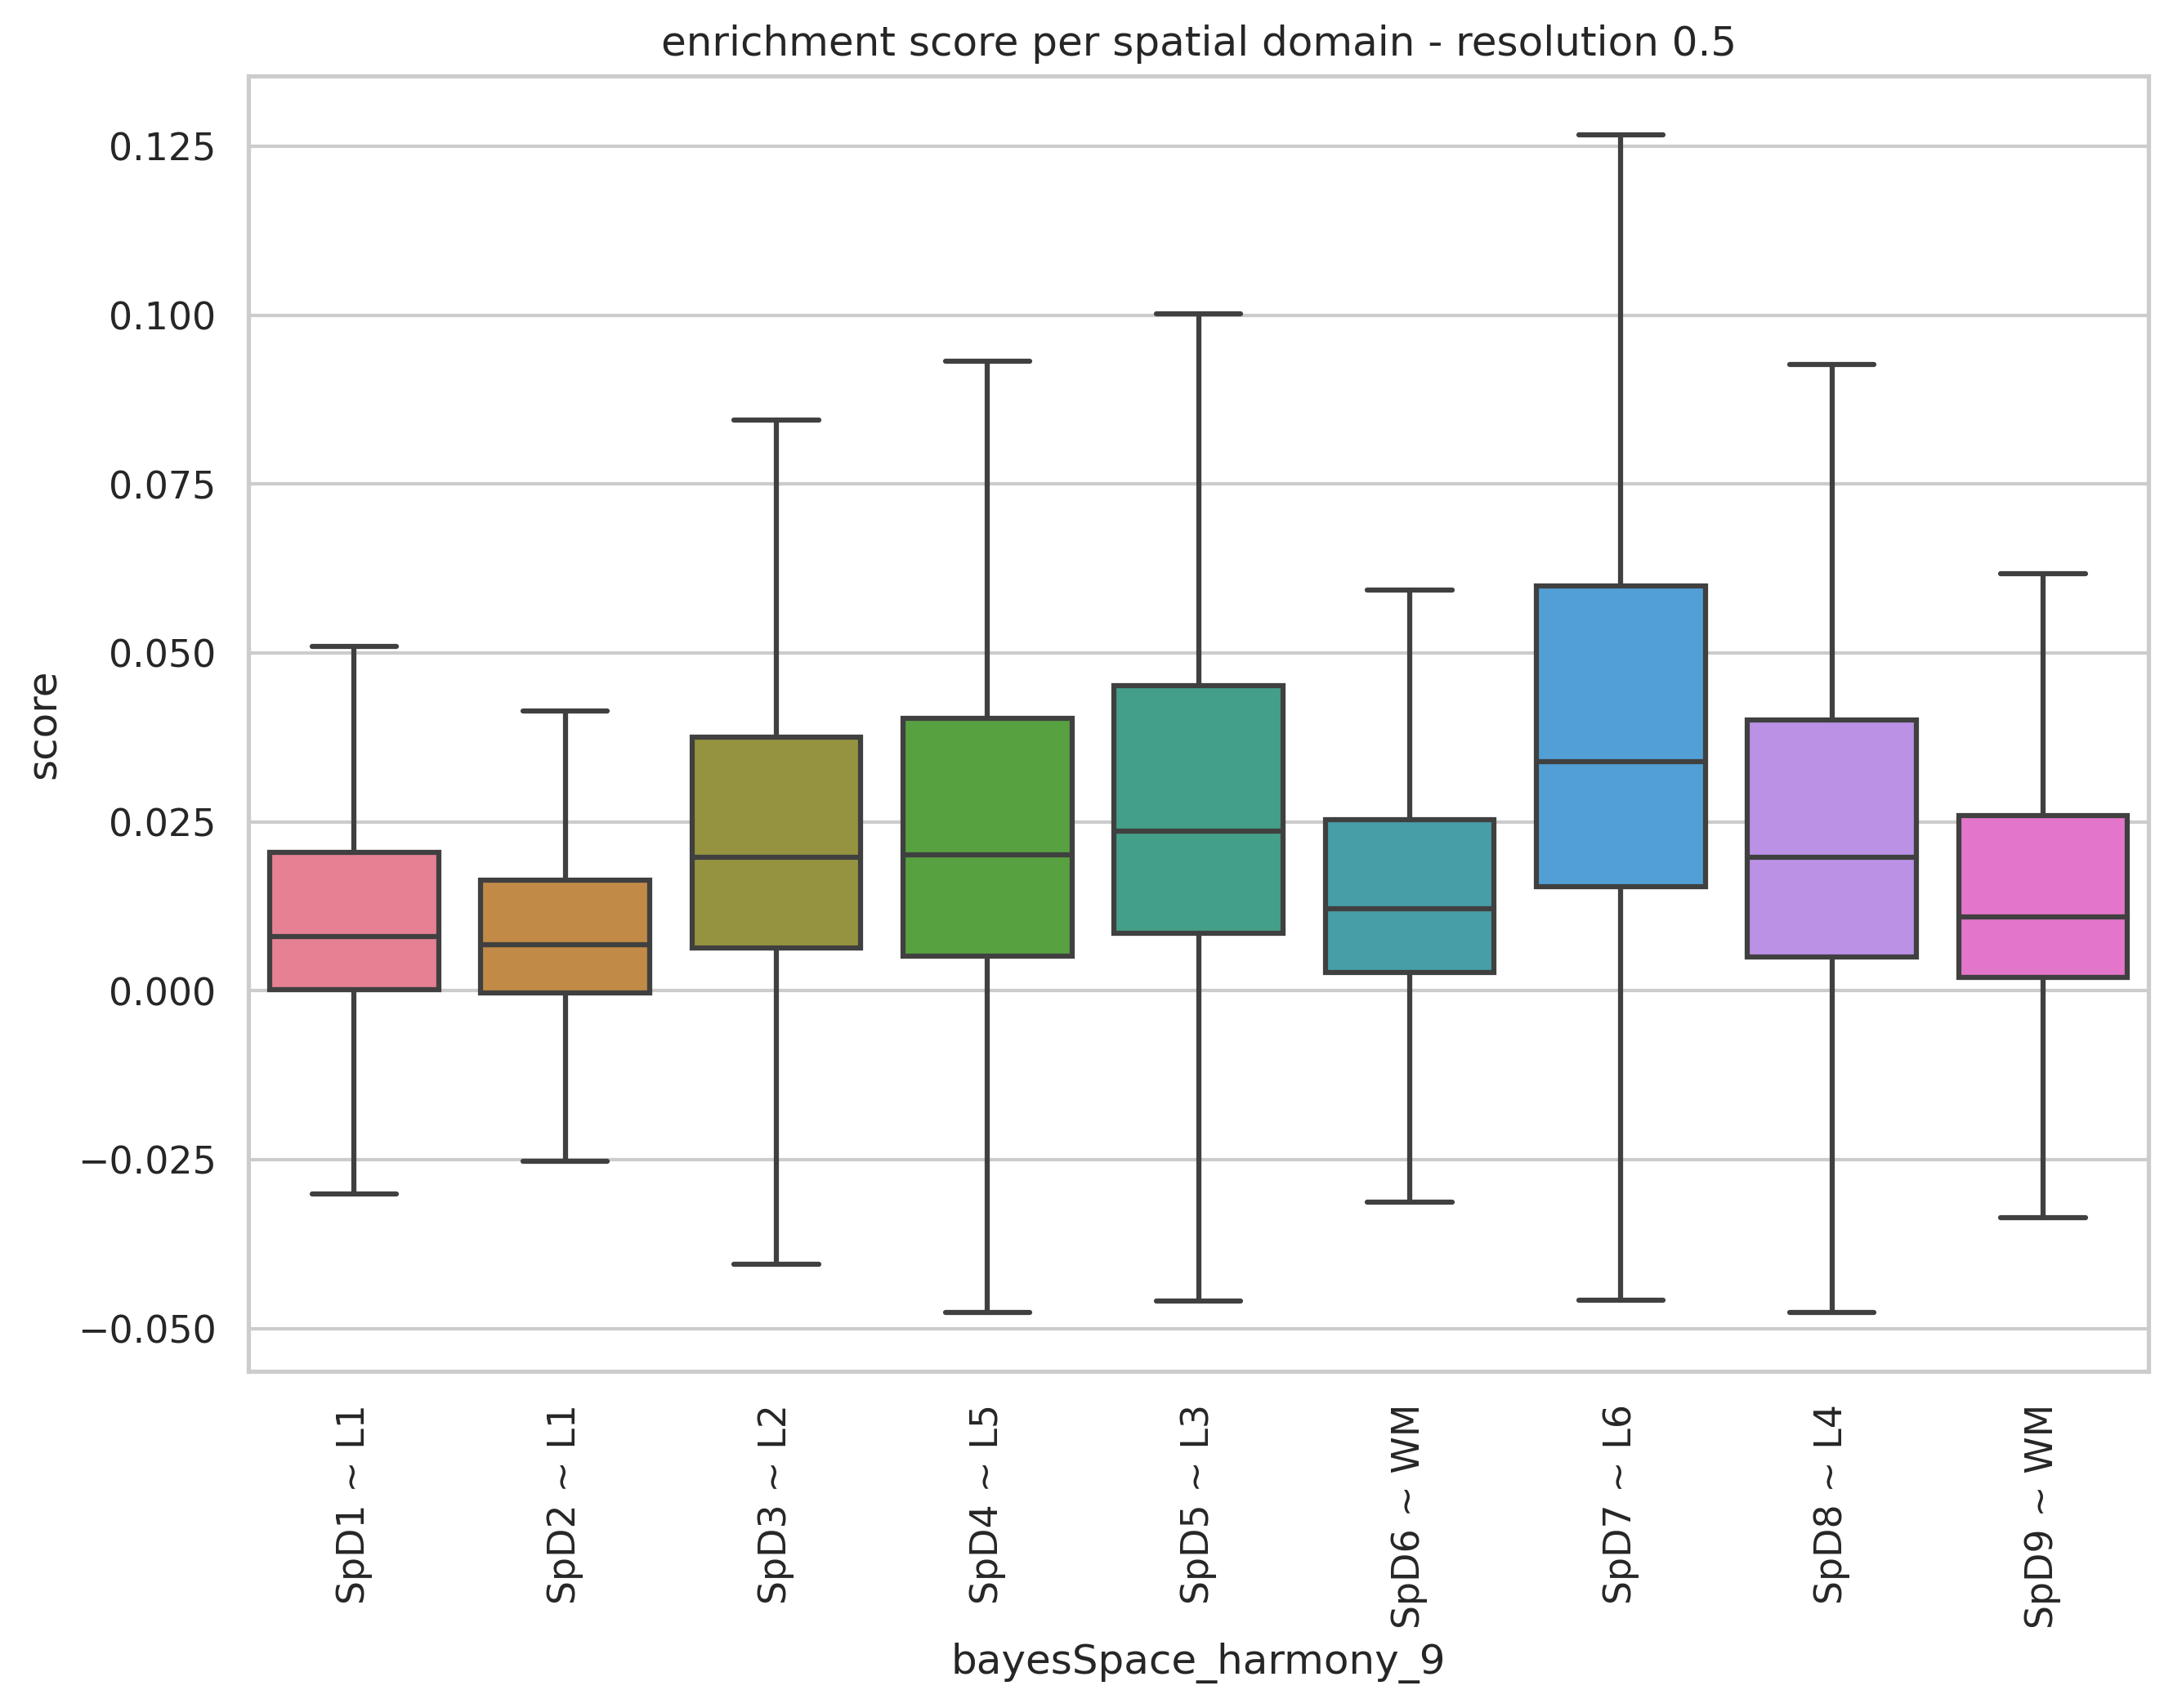

                  0
SpD1 ~ L1  0.325778
SpD2 ~ L1  0.333906
SpD3 ~ L2  0.214601
SpD4 ~ L5  0.256642
SpD5 ~ L3  0.182652
SpD6 ~ WM  0.171243
SpD7 ~ L6  0.112201
SpD8 ~ L4  0.250702
SpD9 ~ WM  0.221973
0.6


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

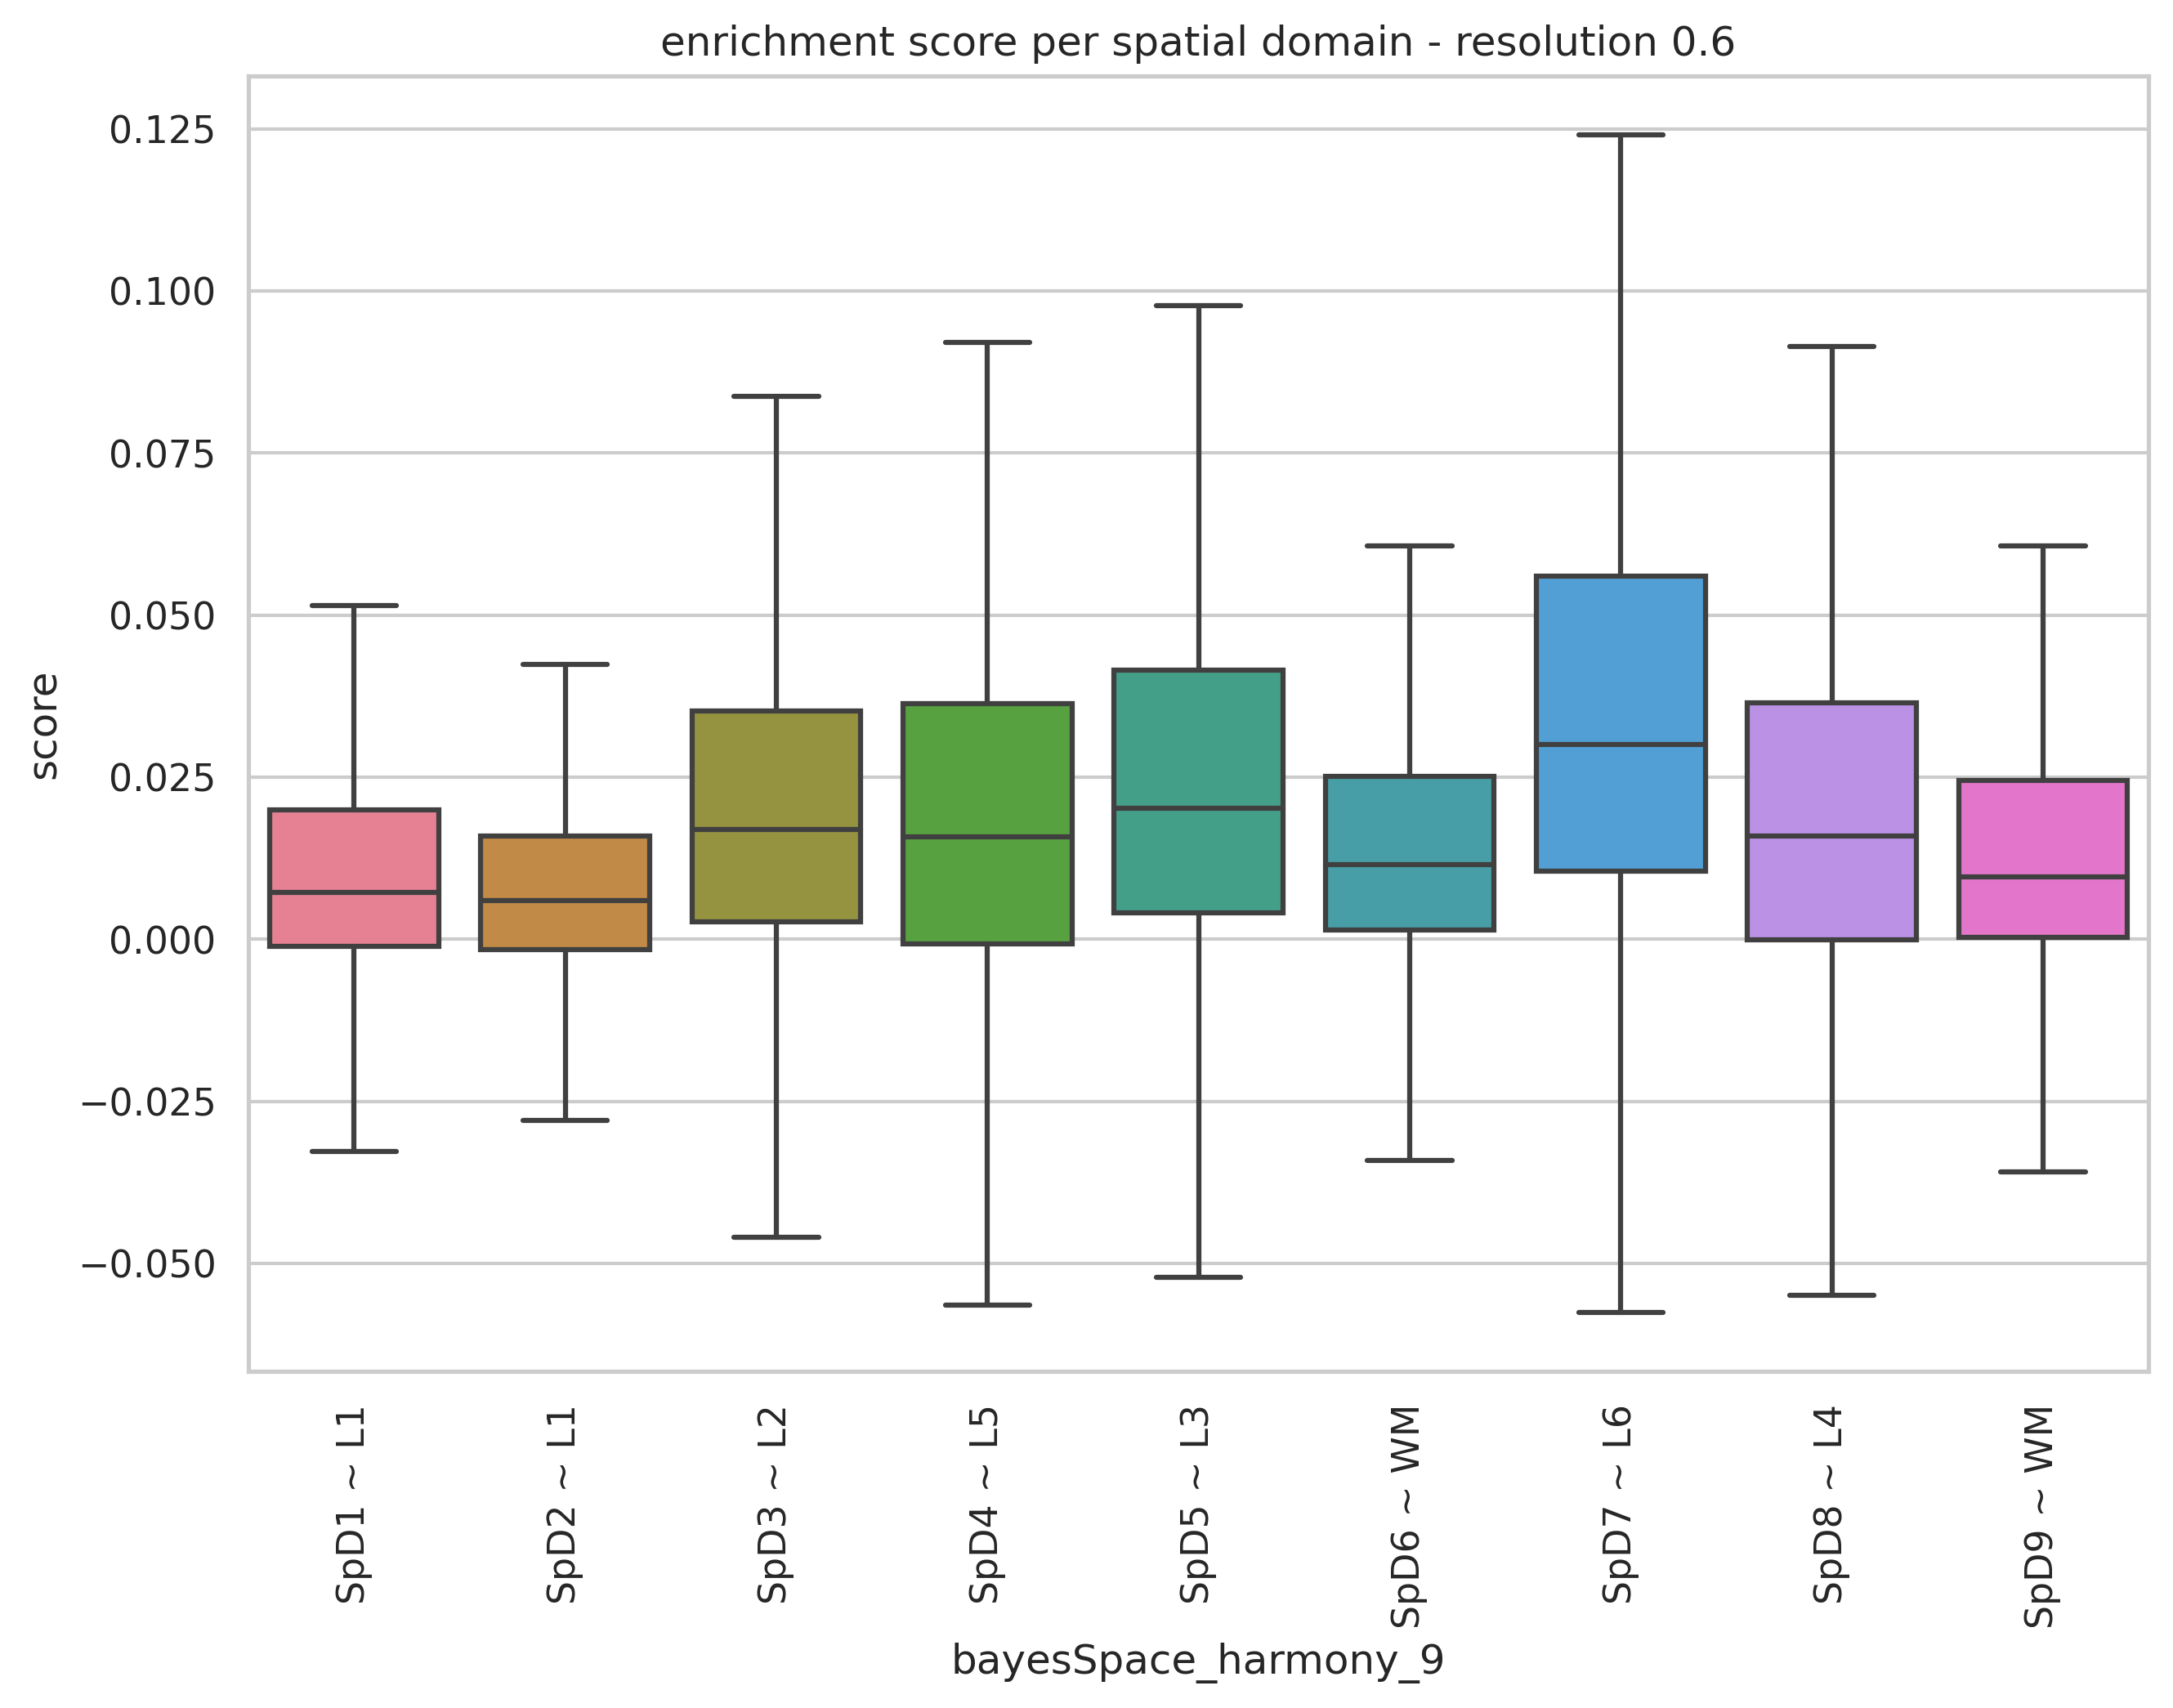

                  0
SpD1 ~ L1  0.490248
SpD2 ~ L1  0.506256
SpD3 ~ L2  0.531054
SpD4 ~ L5  0.706688
SpD5 ~ L3  0.552366
SpD6 ~ WM  0.390766
SpD7 ~ L6  0.455017
SpD8 ~ L4  0.649092
SpD9 ~ WM  0.484518
0.7


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

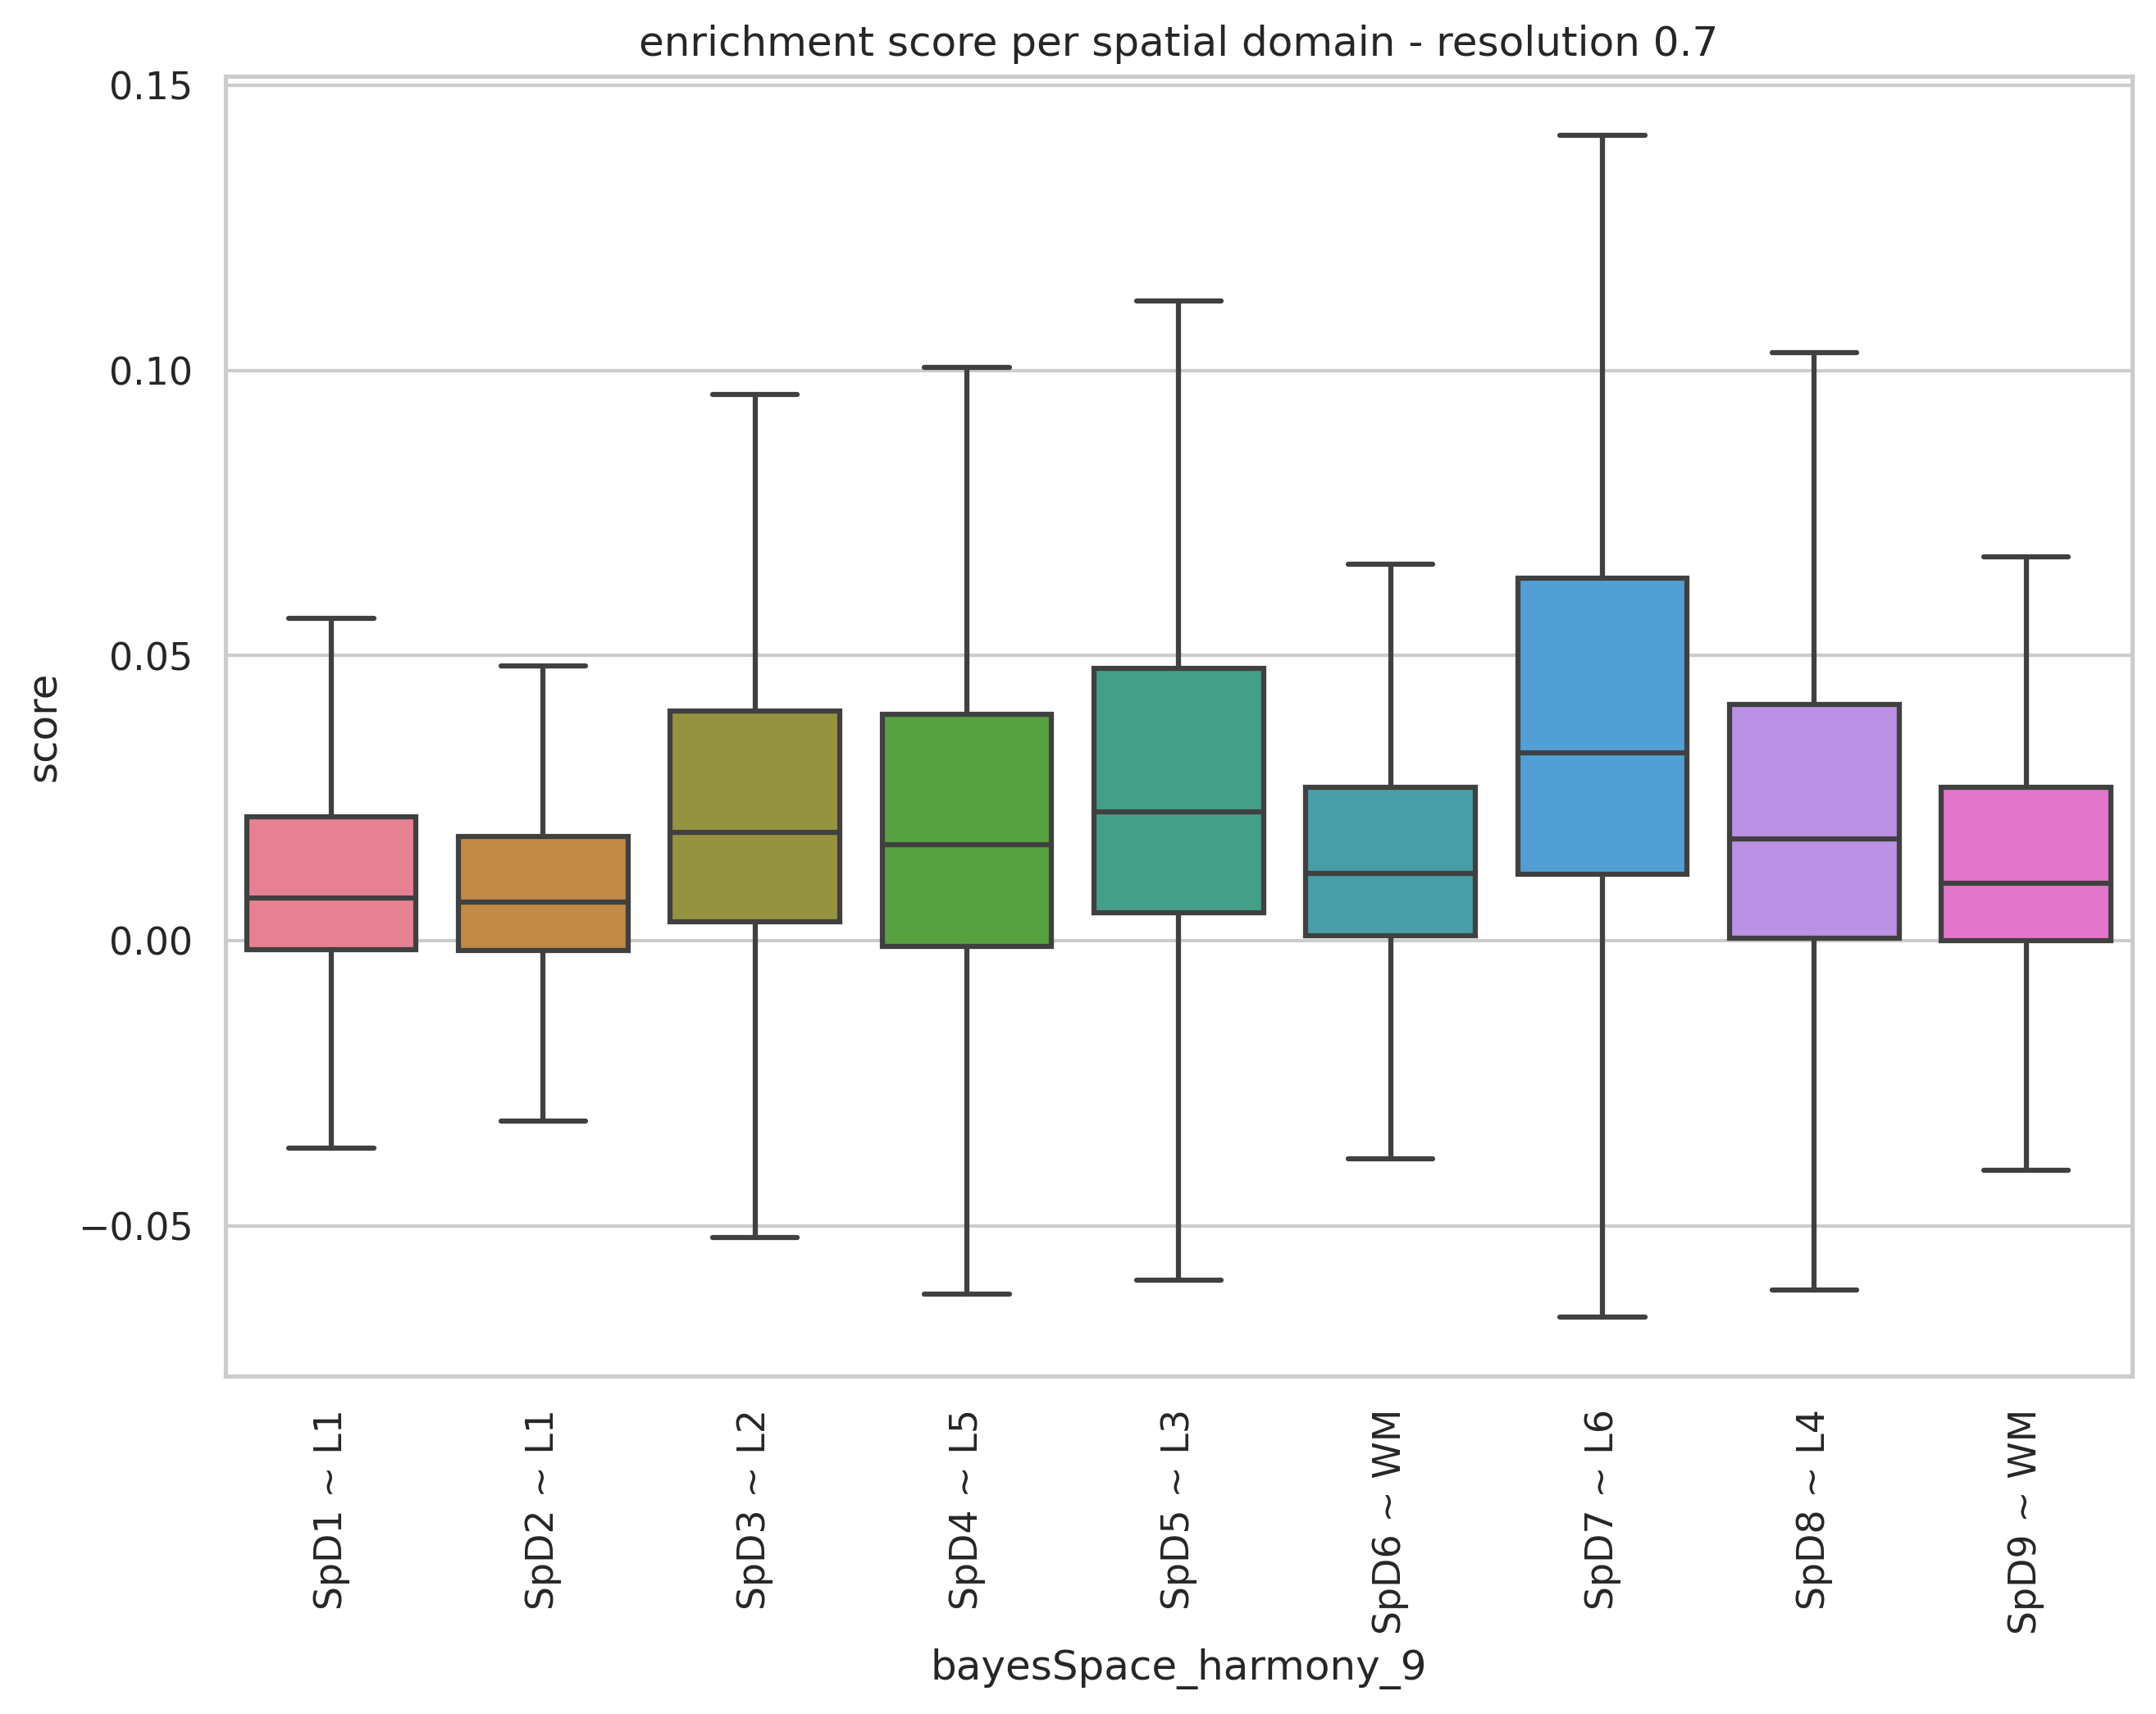

                  0
SpD1 ~ L1  0.346863
SpD2 ~ L1  0.282998
SpD3 ~ L2  0.163105
SpD4 ~ L5  0.277467
SpD5 ~ L3  0.149364
SpD6 ~ WM  0.320610
SpD7 ~ L6  0.104652
SpD8 ~ L4  0.206963
SpD9 ~ WM  0.300448


In [3]:
reslist = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']

for res in range(0,len(reslist)):
    print(reslist[res])
    top = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % reslist[res], sep = ',', index_col = 0)
    for n in range(0,10):
        sc.tl.score_genes(adata, list(adata.var[adata.var['gene_name'].isin(list(top['0']))].index), ctrl_size = len(list(top['0'])))
        df = adata.obs['score']
        if (n == 0):
            all_scores = df
        else: 
            all_scores = pd.concat([all_scores, df], axis = 1)
    adata.obs['score'] = all_scores.median(axis = 1)
    if (res==0):
        temp = adata.obs[['bayesSpace_harmony_2', 'bayesSpace_harmony_9','bayesSpace_harmony_16','bayesSpace_harmony_28', 'score']]
        temp['resolution'] = reslist[res]
        sd = temp
    else:
        temp = adata.obs[['bayesSpace_harmony_2', 'bayesSpace_harmony_9','bayesSpace_harmony_16','bayesSpace_harmony_28', 'score']]
        temp['resolution'] = reslist[res]
        sd = pd.concat([sd,temp], axis = 0)
    sns.set_theme(style="whitegrid", palette= sns.color_palette("husl", 9))
    plt.figure(figsize=(10,7), dpi = 300)
    sns.boxplot(data=sd, x="bayesSpace_harmony_9", y="score", showfliers=False)
    plt.title('enrichment score per spatial domain - resolution %s' % reslist[res])
    plt.xticks(rotation=90)
    plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/res_%s_bayespace_harmony_9_across_resolutions.pdf' % reslist[res], bbox_inches = 'tight')
    plt.show()

    pvals = []
    for cluster in sd['bayesSpace_harmony_9'].unique().sort_values():
        subset_res = sd[sd['resolution']==reslist[res]]
        subset = subset_res[subset_res['bayesSpace_harmony_9']==cluster]
        pvals.append((subset['score']<=0).sum()/len(subset['score']))

    print(pd.DataFrame(pvals, index = sd['bayesSpace_harmony_9'].unique().sort_values()))
    sd.to_csv('processed_data/03-LR_network_visualisation/03e_network_spatial_analysis/scores_per_spatial_domain_all_resolutions')
    

In [5]:
sd

,bayesSpace_harmony_2,bayesSpace_harmony_9,bayesSpace_harmony_16,bayesSpace_harmony_28,score,resolution
key,,,,,,
AAACAACGAATAGTTC-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD7 ~ L6,7,14,0.046406,0.1
AAACAAGTATCTCCCA-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD3 ~ L2,8,9,0.047967,0.1
AAACAATCTACTAGCA-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,1,SpD9 ~ WM,13,16,0.019050,0.1
AAACAGAGCGACTCCT-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD7 ~ L6,12,19,0.034113,0.1
AAACAGCTTTCAGAAG-1_Br6471_post-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,2,SpD3 ~ L2,8,2,0.031964,0.1
...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1_Br3942_ant-1,2,SpD4 ~ L5,4,4,-0.091303,0.7
TTGTTGTGTGTCAAGA-1_Br3942_ant-1,2,SpD3 ~ L2,8,1,0.118904,0.7
TTGTTTCACATCCAGG-1_Br3942_ant-1,1,SpD9 ~ WM,13,6,0.058046,0.7


0.1


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an in

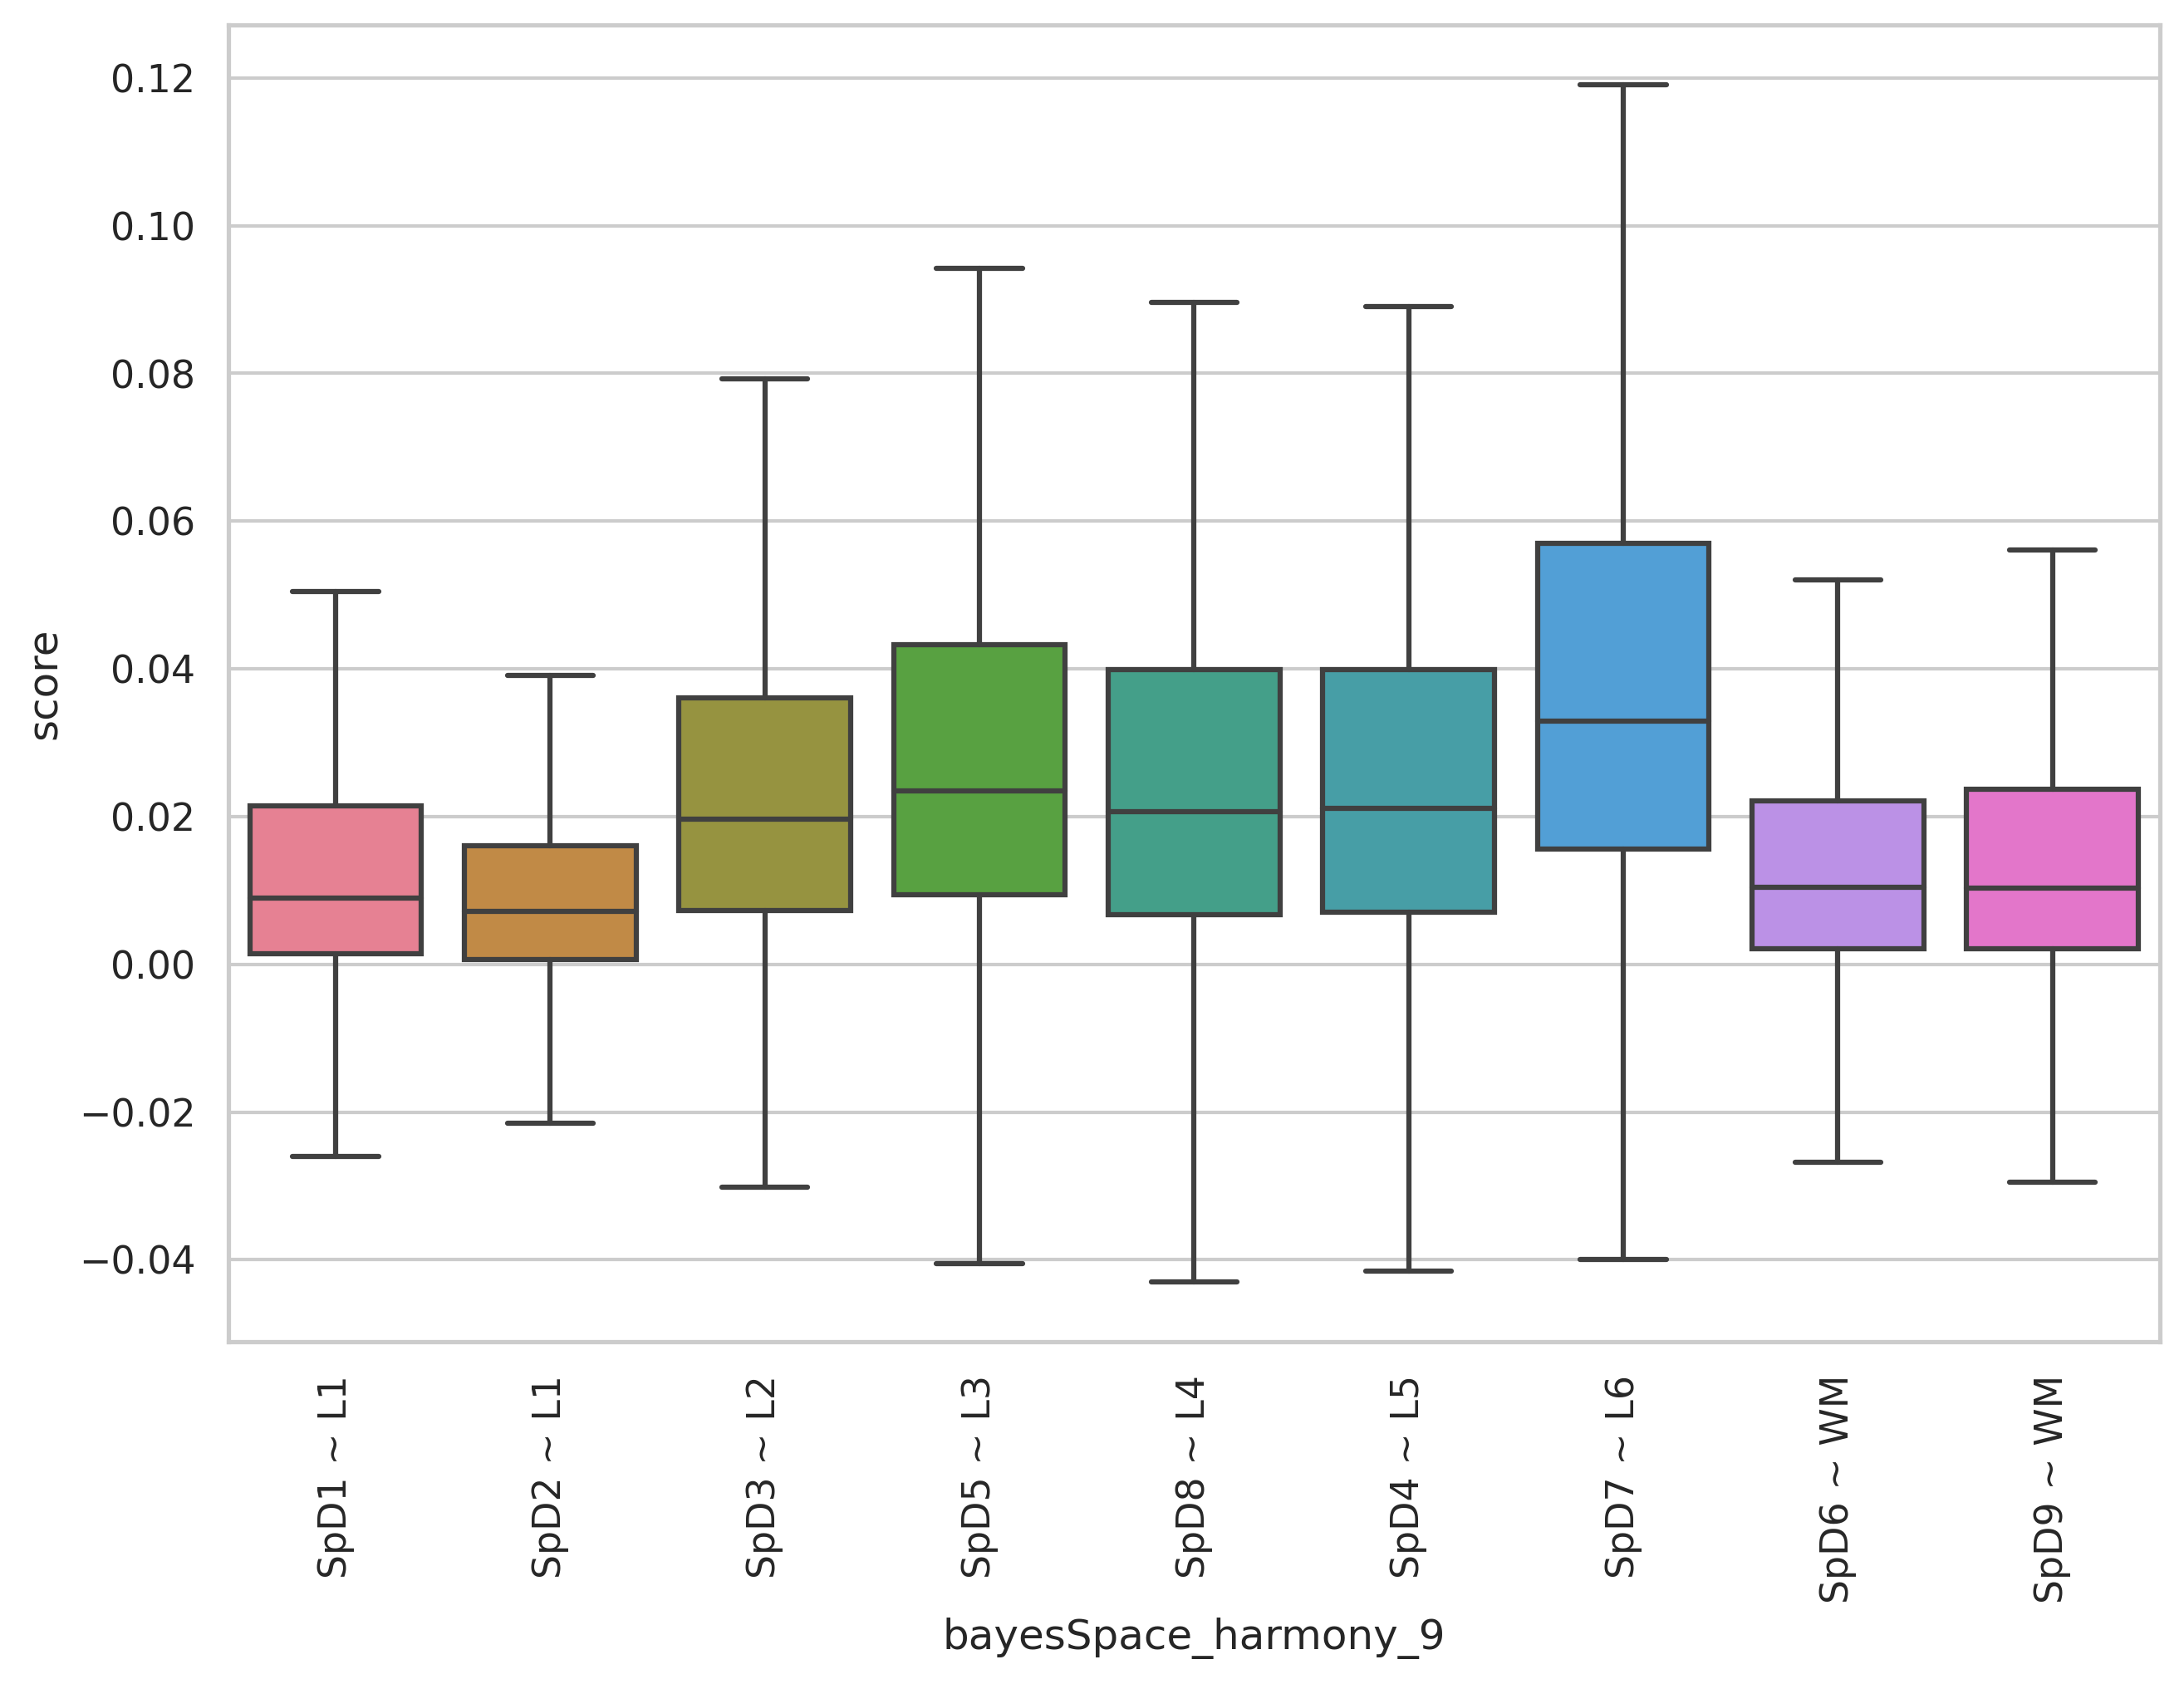

0.2


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


KeyboardInterrupt: 

In [58]:
reslist = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']

for res in range(0,len(reslist)):
    print(reslist[res])
    top = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % reslist[res], sep = ',', index_col = 0)
    for n in range(0,10):
        sc.tl.score_genes(adata, list(adata.var[adata.var['gene_name'].isin(list(top['0']))].index), ctrl_size = len(list(top['0'])))
        df = adata.obs['score']
        if (n == 0):
            all_scores = df
        else: 
            all_scores = pd.concat([all_scores, df], axis = 1)
    adata.obs['score'] = all_scores.median(axis = 1)
    if (res==0):
        temp = adata.obs[['bayesSpace_harmony_9', 'bayesSpace_harmony_16', 'score']]
        temp['resolution'] = reslist[res]
        sd = temp
    else:
        temp = adata.obs[['bayesSpace_harmony_9', 'bayesSpace_harmony_16', 'score']]
        temp['resolution'] = reslist[res]
        sd = pd.concat([sd,temp], axis = 0)
    sns.set_theme(style="whitegrid", palette= sns.color_palette("husl", 9))
    plt.figure(figsize=(10,7), dpi = 300)
    sns.boxplot(data=sd, x="bayesSpace_harmony_9", y="score", showfliers=False, order = ['SpD1 ~ L1', 'SpD2 ~ L1', 'SpD3 ~ L2','SpD5 ~ L3','SpD8 ~ L4', 'SpD4 ~ L5', 'SpD7 ~ L6', 'SpD6 ~ WM', 'SpD9 ~ WM'])
    plt.title('enrichment score per spatial domain - resolution %s' % reslist[res])
    plt.xticks(rotation=90)
    plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/res_%s_bayespace_harmony_9_across_resolutions.pdf' % reslist[res], bbox_inches = 'tight')
    plt.show()

    pvals = []
    for cluster in sd['bayesSpace_harmony_9'].unique().sort_values():
        subset = sd[sd['bayesSpace_harmony_9']==cluster]
        pvals.append((subset['score']<=0).sum()/len(subset['score']))

    pd.DataFrame(pvals, index = sd['bayesSpace_harmony_9'].unique().sort_values()).to_csv('processed_data/03-LR_network_visualisation/03e_network_spatial_analysis/res_%s_pvalues_scores_per_cluster.csv' % reslist[res])

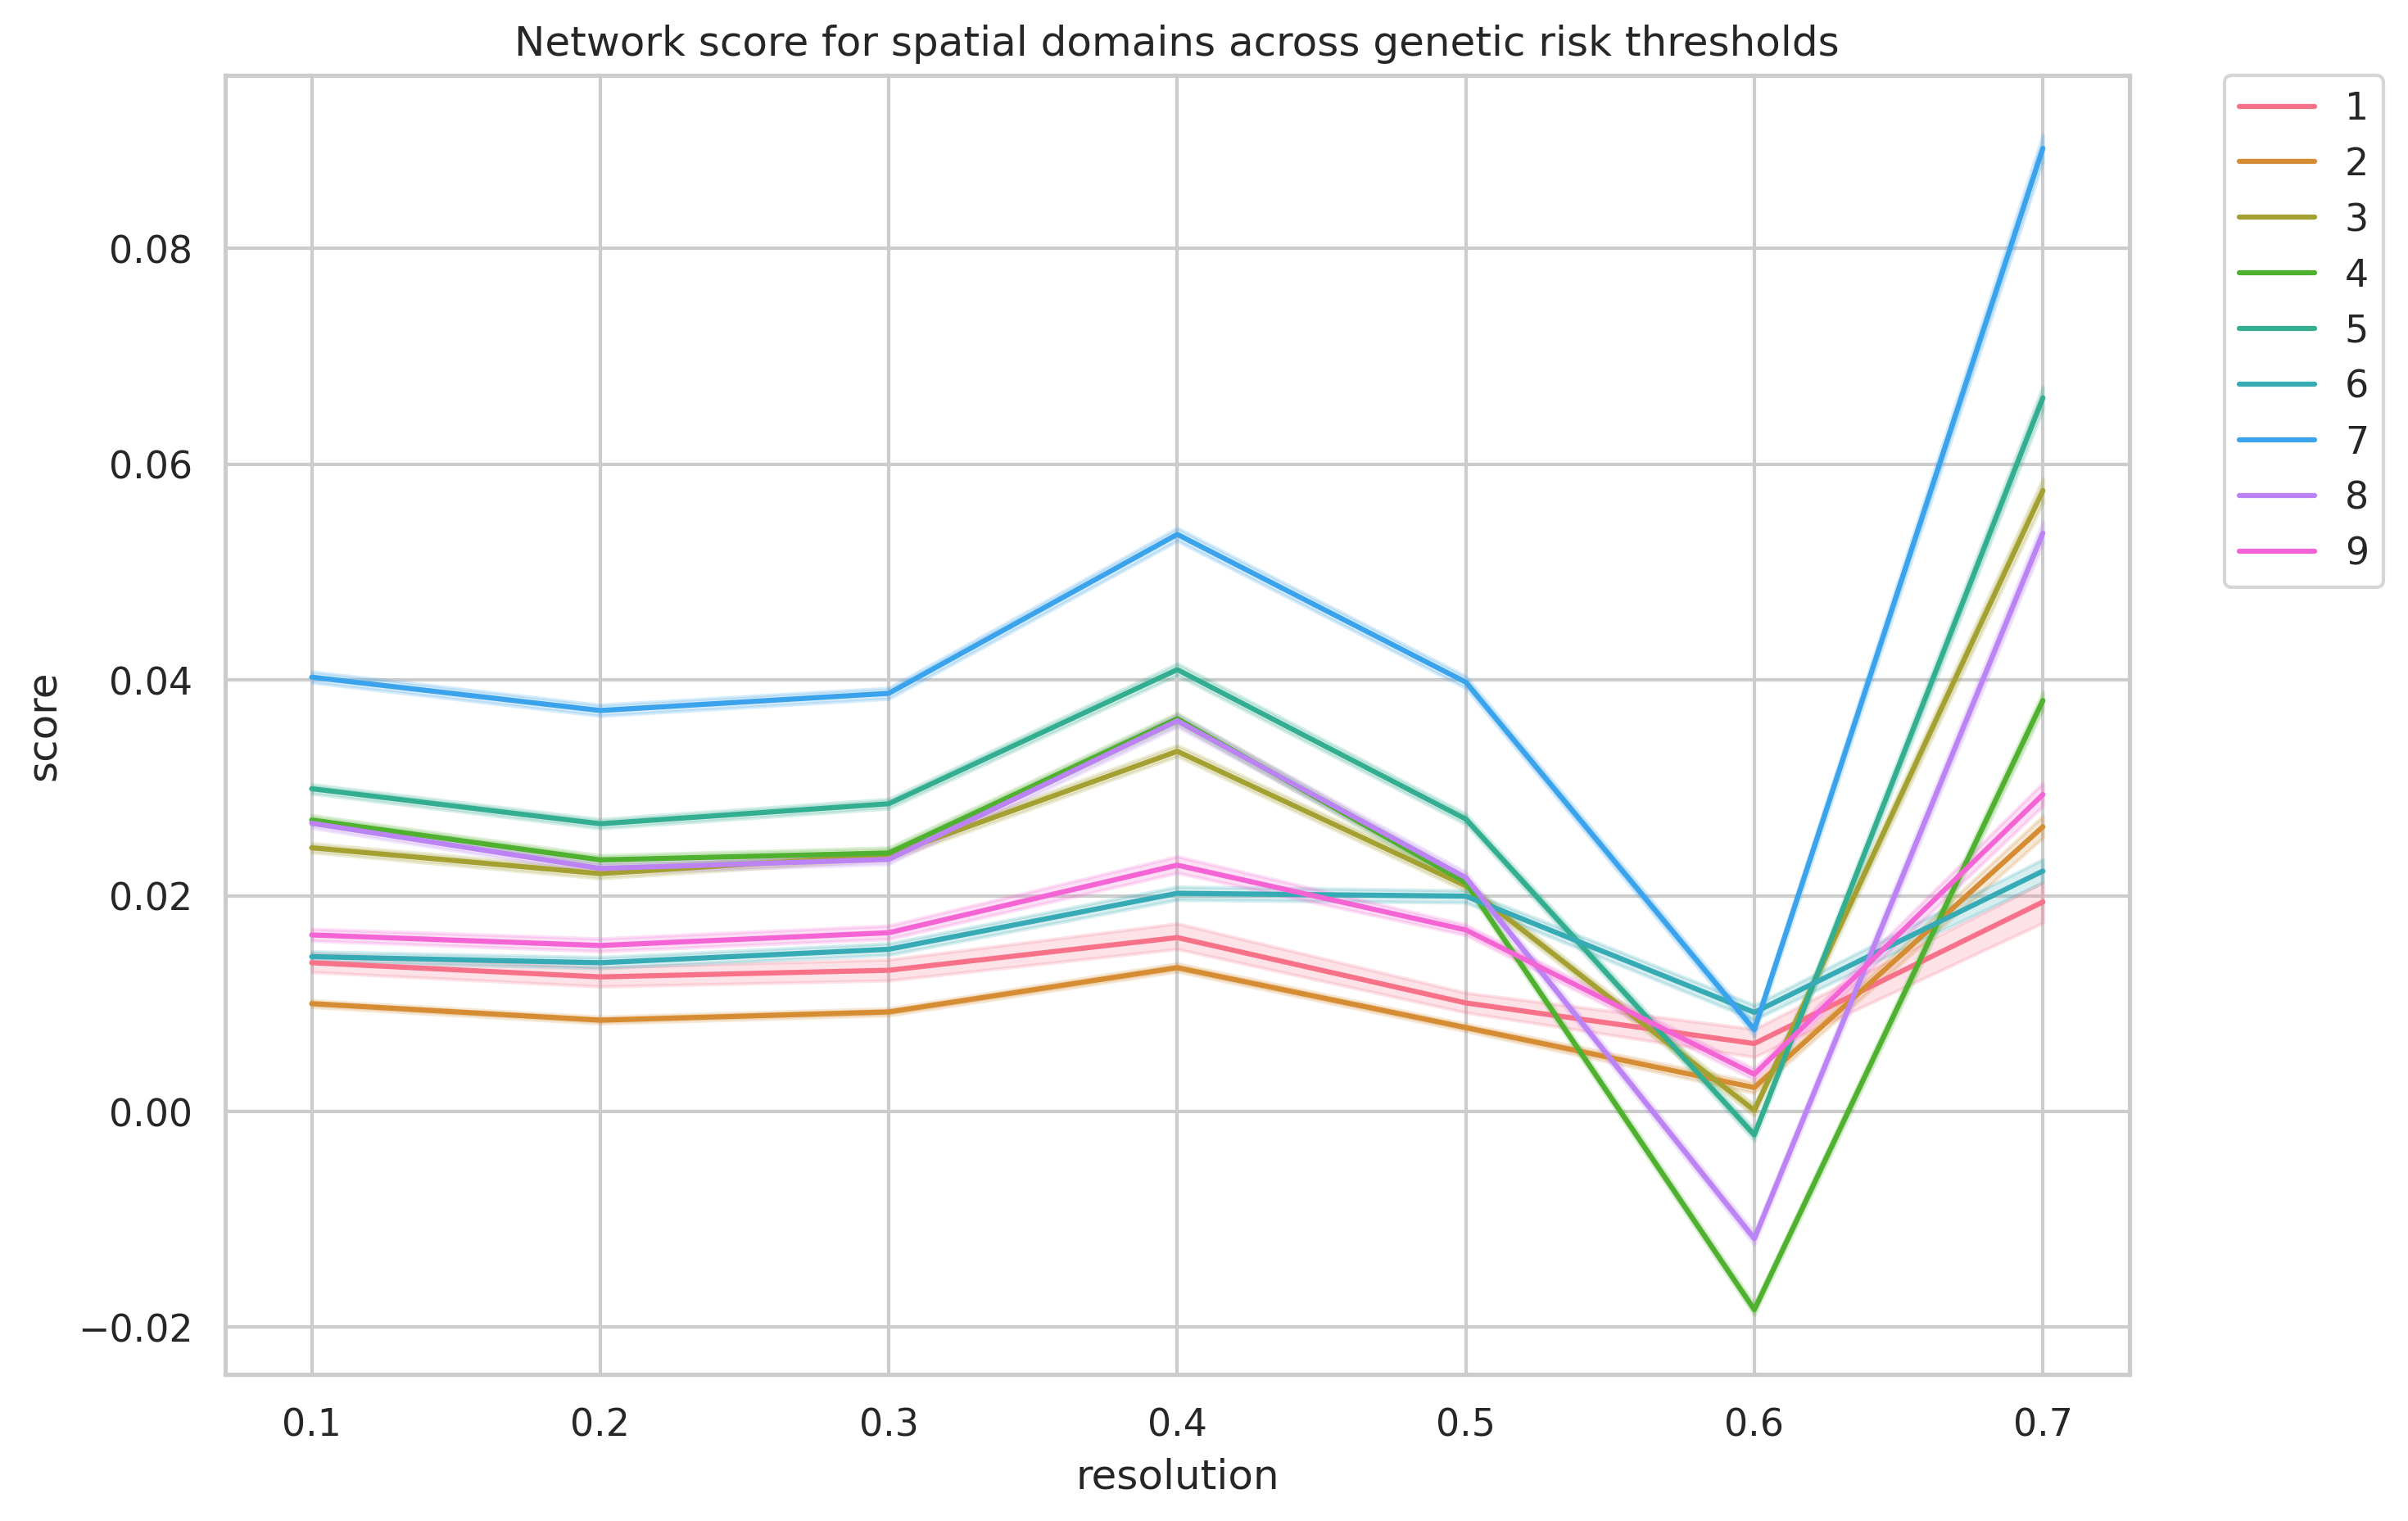

In [36]:
sns.set_theme(style="whitegrid", palette= sns.color_palette("husl", 9))
plt.figure(figsize=(10,7), dpi = 300)
sns.lineplot(data=sd.reset_index(), x="resolution", y="score", hue = "bayesSpace_harmony_9")
plt.title('Network score for spatial domains across genetic risk thresholds')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/bayespace_harmony_9_across_resolutions.pdf', bbox_inches = 'tight')
plt.show()

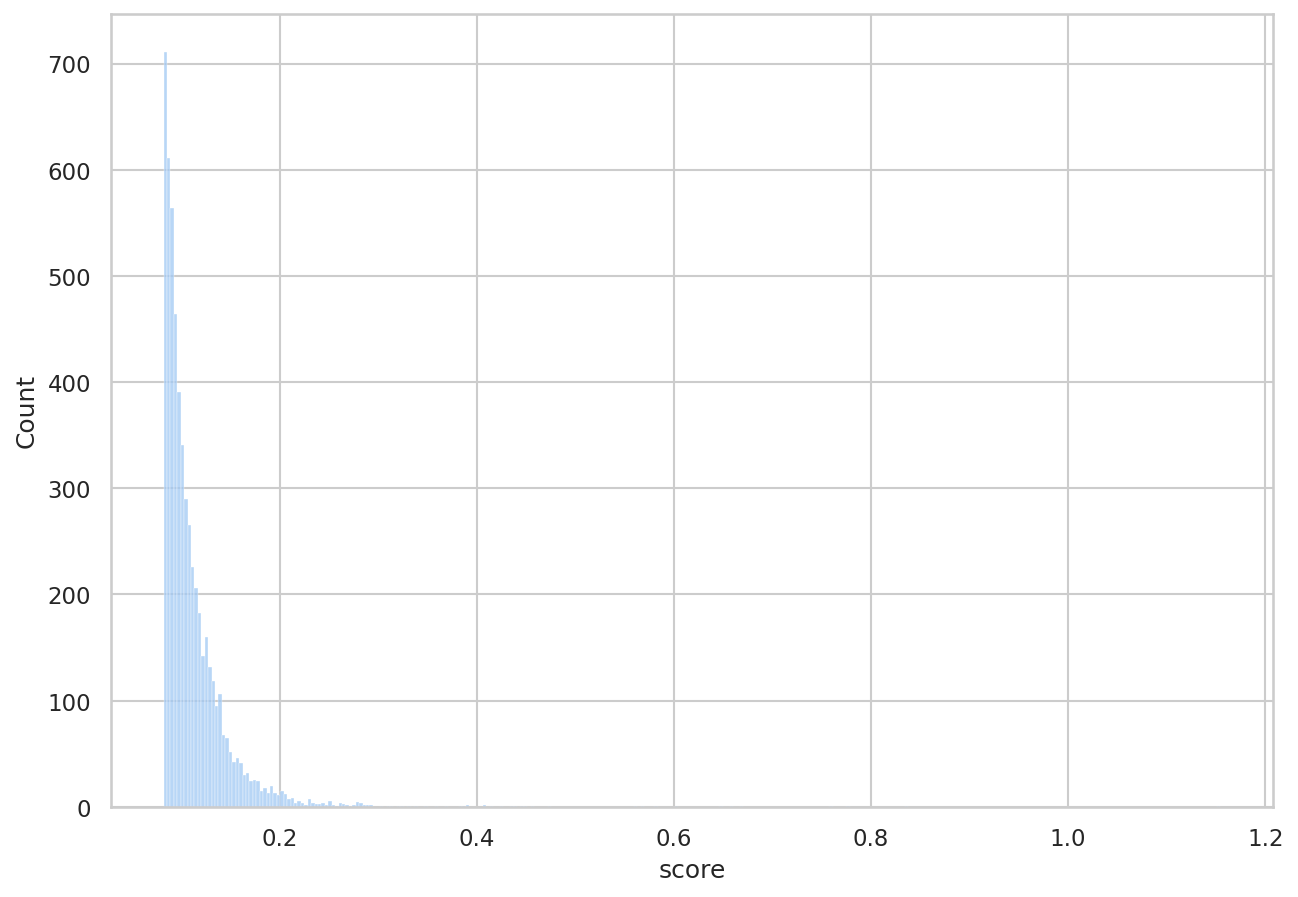

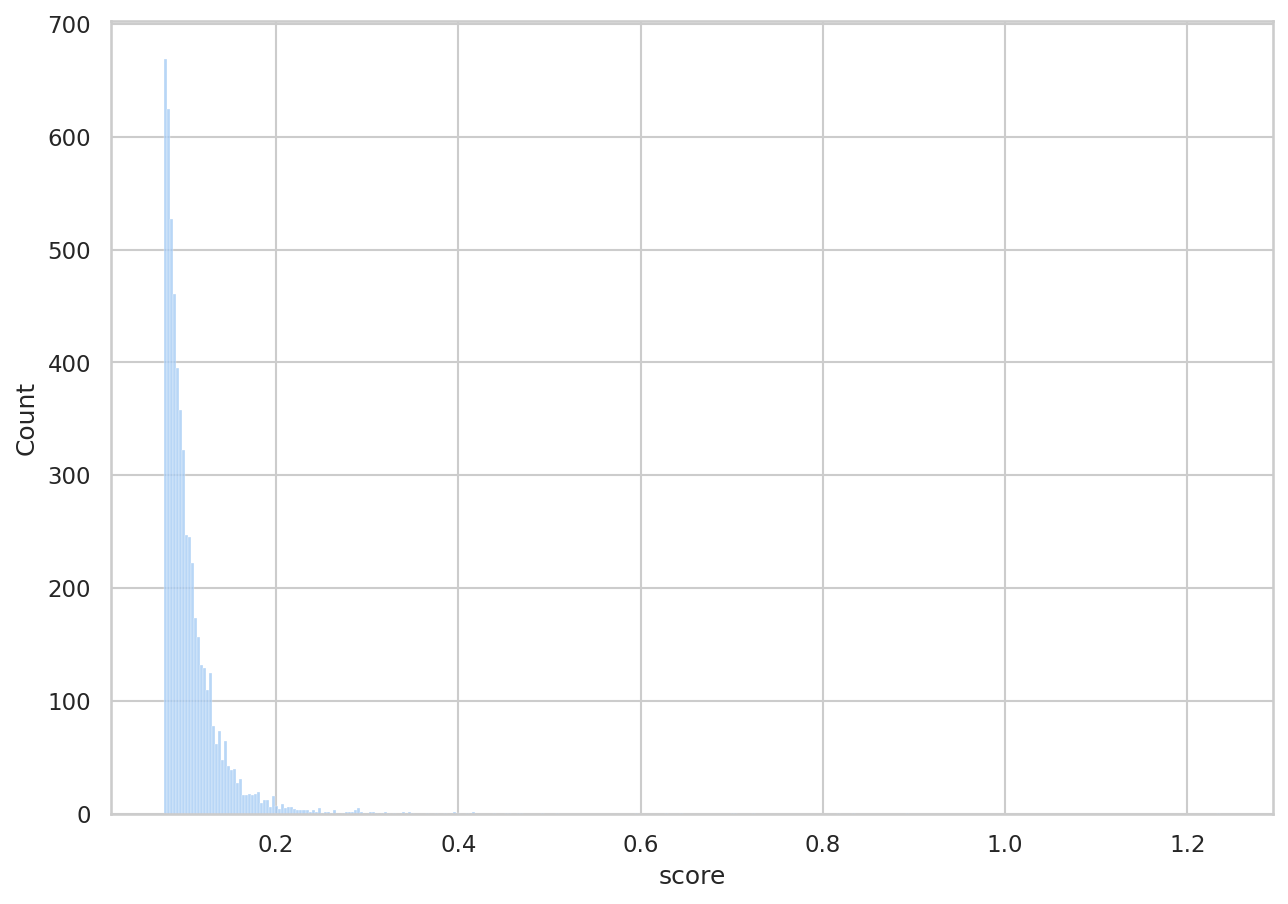

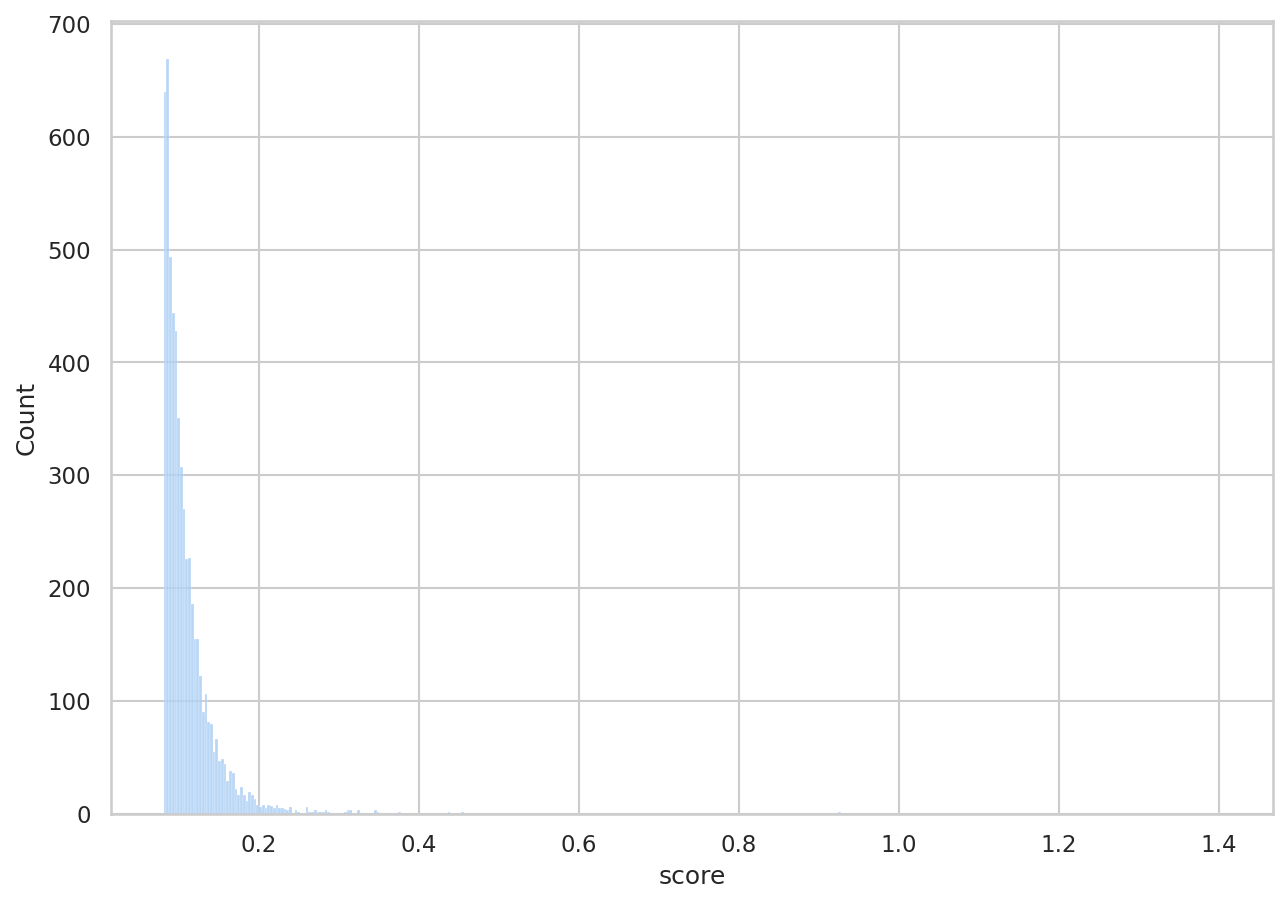

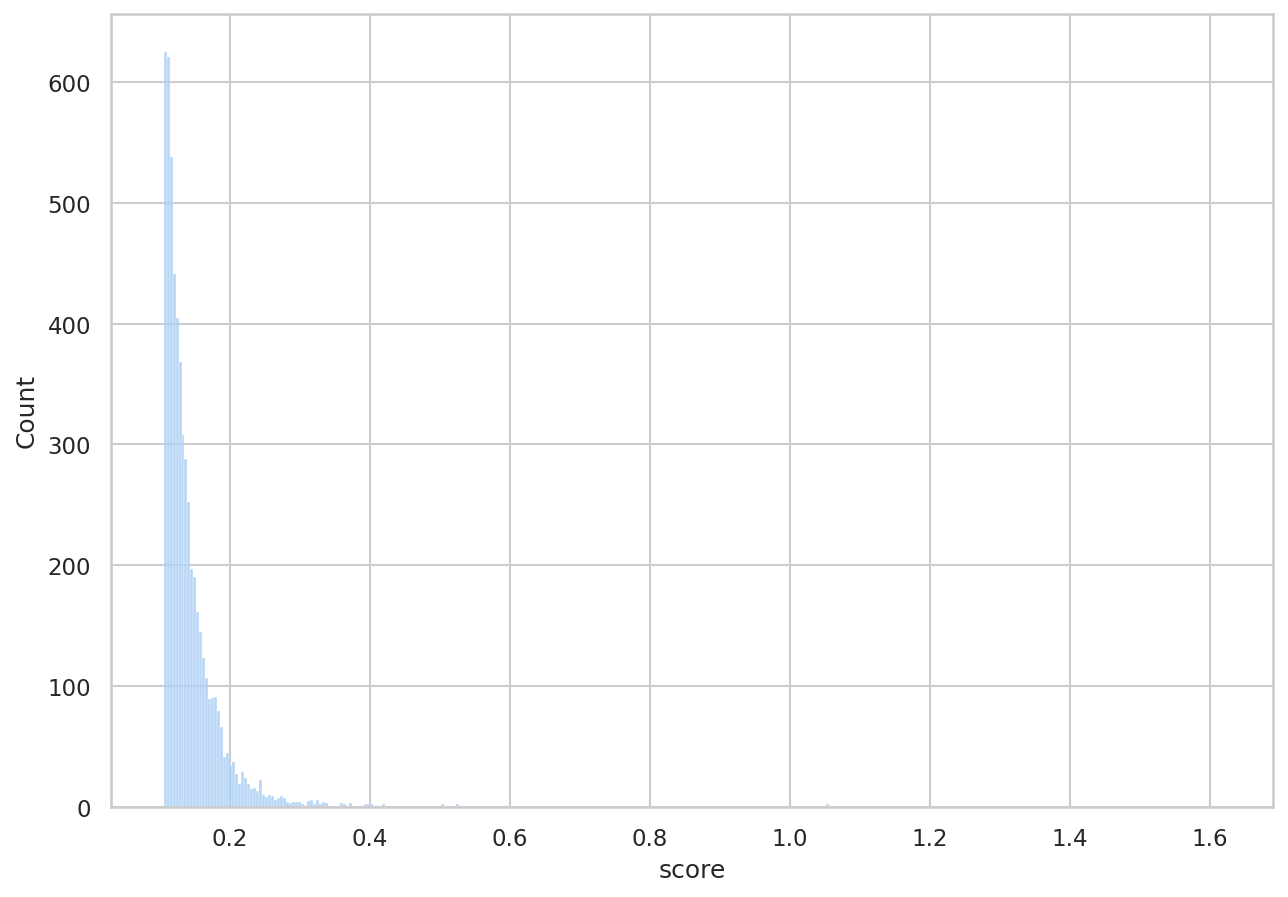

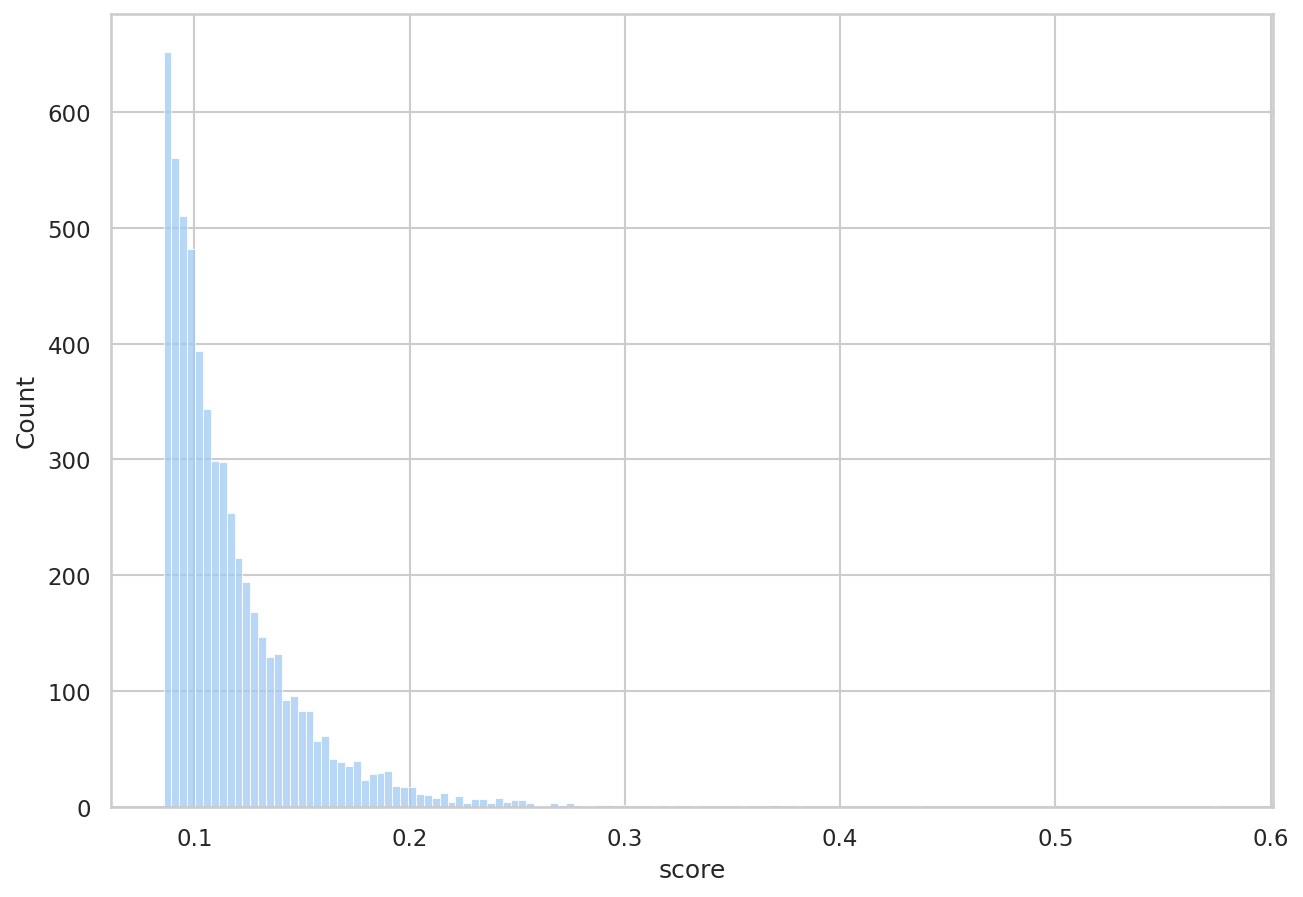

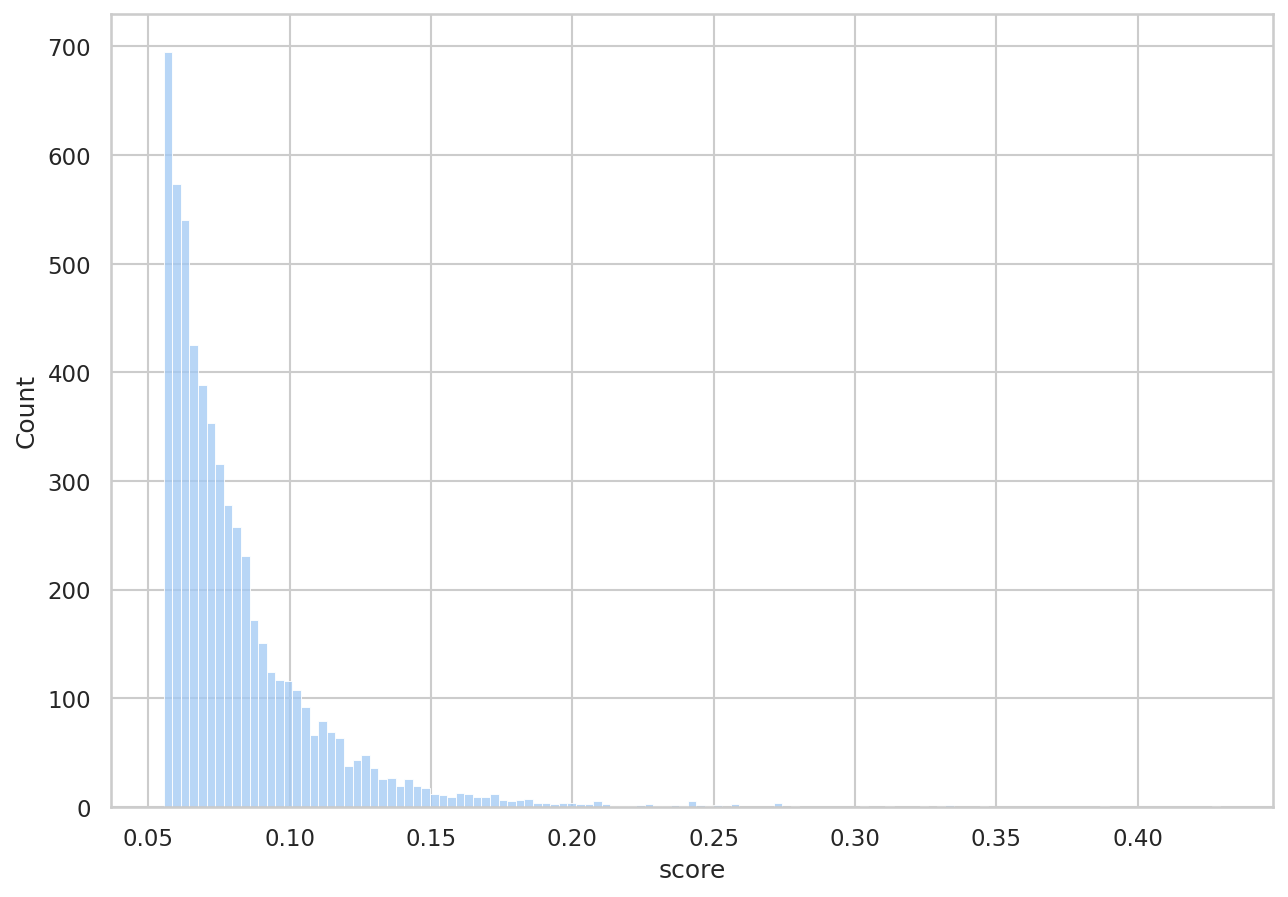

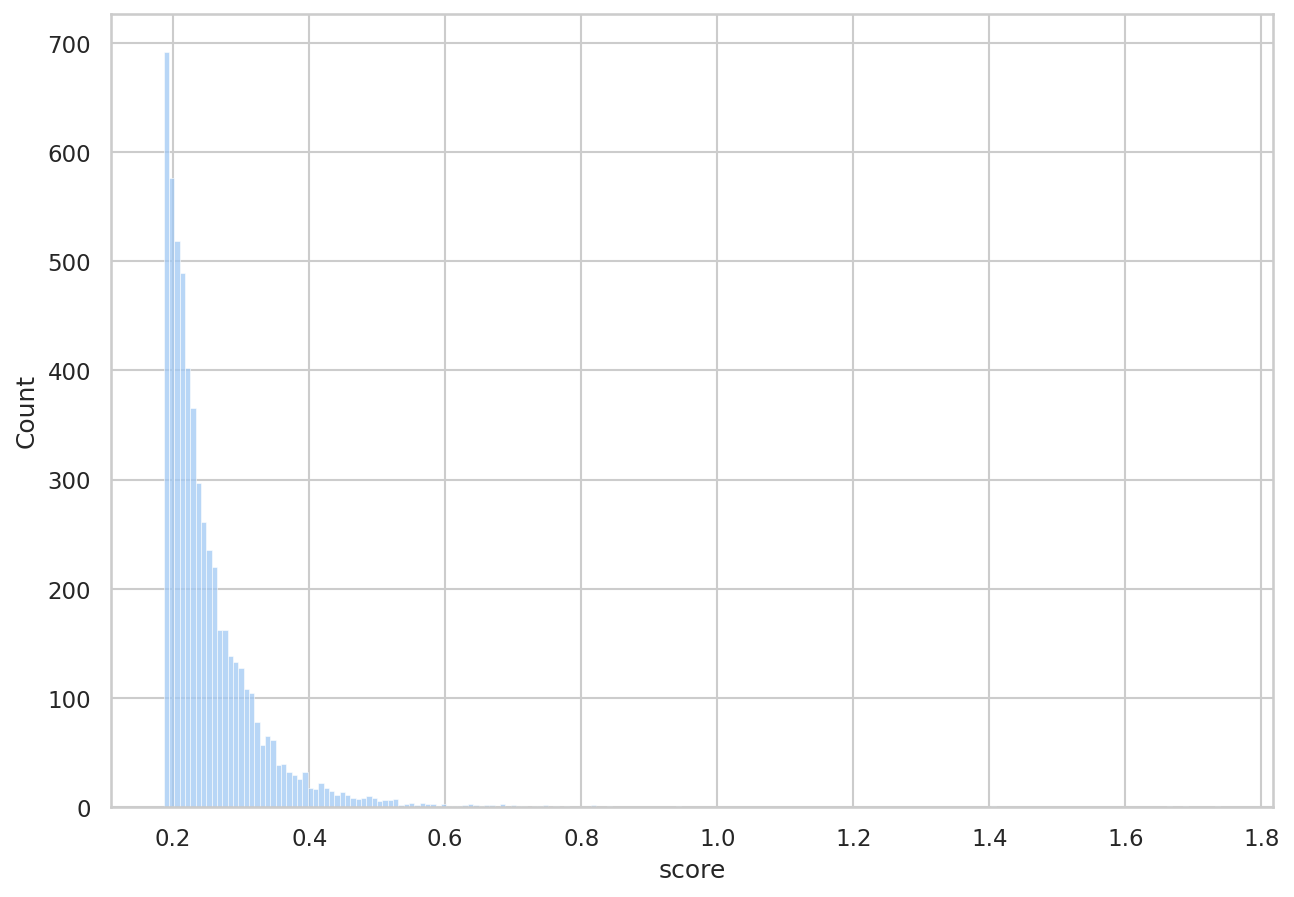

In [27]:
def network_top3(adata):
    probs = adata.obs[['Astro', 'EndoMural', 'Micro', 'Oligo', 'OPC', 'Excit_L2_3', 'Excit_L3',
       'Excit_L3_4_5', 'Excit_L4', 'Excit_L5', 'Excit_L5_6', 'Excit_L6',
       'Inhib']]

    print("Building adjacency matrix for top 3 cells per spot...")
    hot1 = copy.copy(probs)
    hot1.iloc[:,:] = 0
    for m in range (0,np.shape(probs)[0]):
        hot1.iloc[m,:][probs.T[probs.index[m]].nlargest(6).index]=1

    adj = hot1.T.dot(hot1)
    np.fill_diagonal(adj.values, 0)
    adj = adj = pd.DataFrame(np.tril(adj), index = adj.index, columns = adj.columns)
    adjmat_notnorm = adj
    adjmat = (adj/adj.sum().sum())
    print("Done.")
    print(adjmat.sum().sum())
    
    sns.heatmap(pd.DataFrame(adjmat), cmap = 'inferno_r')
    #plt.savefig("../../../plots/gene-risk-LR-analysis/03-colocalisation_analysis/%s_c2l_3cells_heatmap.pdf" % (tgt), dpi = 150, bbox_inches = 'tight')
    plt.show()
    plt.clf()
    #adjmat_notnorm.to_csv("../../../processed-data/gene-risk-LR-analysis/03-colocalisation_analysis/%s_c2l_3cells_adjacencymatrix_notnormalised.csv" % (tgt))
    #adjmat.to_csv("../../../processed-data/gene-risk-LR-analysis/03-colocalisation_analysis/%s_c2l_3cells_adjacencymatrix.csv" % (tgt))
    return adjmat


reslist = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']

for res in range(0,len(reslist)):
    qt = sd[sd['resolution']==reslist[res]]['score'].quantile(0.95)
    sub = sd[sd['resolution']==reslist[res]]

    plt.figure(figsize=(10,7), dpi = 150)
    sns.histplot(sub[sub['score']>qt]['score'])
    plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/histogram_score_distribution_per_resolution_%s.pdf' % reslist[res], bbox_inches = 'tight')
    plt.show()
    
    plt.figure(figsize=(10,10), dpi = 150)
    sns.heatmap(pd.DataFrame(network_top3(adata[sub[sub['score']>sd[sd['resolution']==reslist[res]]['score'].quantile(0.95)]['score'].index])/network_top3(adata[sub[sub['score']<sd[sd['resolution']==reslist[res]]['score'].quantile(0.95)]['score'].index])))
    plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/neighborhood_c2l_top95pct_per_resolution_%s.pdf' % reslist[res], bbox_inches = 'tight')
    plt.show()